In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Part 1: read in files

In [2]:
# read in the five files by state
path=r'C:\Users\aleci\Documents\Project 1 - EV Adoption Study\data\\'
population=pd.read_excel(path+'state_data.xls', sheet_name='population')
population.head() 

# change 'Washington, D.C.' to 'District of Columbia'
population['State']=np.where(population['State'].str.contains('D.C'), 'District of Columbia', population['State'])

In [3]:
# We do not need the first row for 'All United States', so we delete this row
population=population[~(population['State']=='All United States')]
population.head(60)

,Rank,State,Population in 2021,Population in 2020
0,24.0,Alabama,5039877,5024279
1,48.0,Alaska,732673,733391
3,14.0,Arizona,7276316,7151502
4,33.0,Arkansas,3025891,3011524
5,1.0,California,39237836,39538223
6,21.0,Colorado,5812069,5773714
7,29.0,Connecticut,3605597,3605944
8,45.0,Delaware,1003384,989948
9,3.0,Florida,21781128,21538187
10,8.0,Georgia,10799566,10711908


In [4]:
# rename total rank
population=population.rename(columns={'Rank': 'Population Rank'})
population.head()

,Population Rank,State,Population in 2021,Population in 2020
0,24.0,Alabama,5039877,5024279
1,48.0,Alaska,732673,733391
3,14.0,Arizona,7276316,7151502
4,33.0,Arkansas,3025891,3011524
5,1.0,California,39237836,39538223


In [5]:
total_size=pd.read_excel(path+'state_data.xls', sheet_name='total_size')
total_size.head()

,Rank,State,Size\n(land & water)\n(square miles)
0,NaN,All United States,3796742.23
1,1.0,Alaska,665384.04
2,2.0,Texas,268596.46
3,3.0,California,163694.74
4,4.0,Montana,147039.71


In [6]:
# rename column Rank
total_size=total_size.rename(columns={'Rank': 'Total Size Rank'})
total_size.head()

,Total Size Rank,State,Size\n(land & water)\n(square miles)
0,NaN,All United States,3796742.23
1,1.0,Alaska,665384.04
2,2.0,Texas,268596.46
3,3.0,California,163694.74
4,4.0,Montana,147039.71


In [7]:
total_size=total_size[~(total_size['State']=='All United States')]
total_size.head()

,Total Size Rank,State,Size\n(land & water)\n(square miles)
1,1.0,Alaska,665384.04
2,2.0,Texas,268596.46
3,3.0,California,163694.74
4,4.0,Montana,147039.71
5,5.0,New Mexico,121590.30


In [8]:
# rename a column name
total_size=total_size.rename(columns={'Size\n(land & water)\n(square miles)': 'total_size'})
total_size.head(60)

,Total Size Rank,State,total_size
1,1.0,Alaska,665384.04
2,2.0,Texas,268596.46
3,3.0,California,163694.74
4,4.0,Montana,147039.71
5,5.0,New Mexico,121590.30
6,6.0,Arizona,113990.30
7,7.0,Nevada,110571.82
8,8.0,Colorado,104093.67
9,9.0,Oregon,98378.54
10,10.0,Wyoming,97813.01


In [9]:
land_size=pd.read_excel(path+'state_data.xls', sheet_name='land_size')
land_size.head()

,Rank,State,Land Area\n(square miles)
0,NaN,All United States,3531905.43
1,1.0,Alaska,570640.95
2,2.0,Texas,261231.71
3,3.0,California,155779.22
4,4.0,Montana,145545.80


In [10]:
# The first row does not have a rank number, so we can also use the column Rank to delete the row
land_size=land_size[land_size['Rank'] >= 1]

# rename the column rank
land_size=land_size.rename(columns={'Rank': 'Land Size Rank', 'Land Area\n(square miles)': 'land area'})
land_size.head(60)

,Land Size Rank,State,land area
1,1.0,Alaska,570640.95
2,2.0,Texas,261231.71
3,3.0,California,155779.22
4,4.0,Montana,145545.80
5,5.0,New Mexico,121298.15
6,6.0,Arizona,113594.08
7,7.0,Nevada,109781.18
8,8.0,Colorado,103641.89
9,9.0,Wyoming,97093.14
10,10.0,Oregon,95988.01


In [11]:
water_area=pd.read_excel(path+'state_data.xls', sheet_name='water_area')
water_area.head()

,Rank,State,Water Area\n(square miles)
0,NaN,All United States,264836.79
1,1.0,Alaska,94743.10
2,2.0,Michigan,40174.61
3,3.0,Florida,12132.94
4,4.0,Wisconsin,11338.57


In [12]:
# You can rename multiple columns together
water_area=water_area.rename(columns={'Rank': 'Water Area Rank', 'Water Area\n(square miles)': 'water area'})
water_area.head()

,Water Area Rank,State,water area
0,NaN,All United States,264836.79
1,1.0,Alaska,94743.10
2,2.0,Michigan,40174.61
3,3.0,Florida,12132.94
4,4.0,Wisconsin,11338.57


In [13]:
# NaN stands for Not a Number, which means the cell is blank. 
# We we also delete the first row in the following way
water_area=water_area.dropna(how='any', axis=0)
water_area.head(60)

,Water Area Rank,State,water area
1,1.0,Alaska,94743.10
2,2.0,Michigan,40174.61
3,3.0,Florida,12132.94
4,4.0,Wisconsin,11338.57
5,5.0,Louisiana,9174.23
6,6.0,California,7915.52
7,7.0,New York,7428.58
8,8.0,Texas,7364.75
9,9.0,Minnesota,7309.09
10,10.0,North Carolina,5201.25


In [14]:
population_density=pd.read_excel(path+'state_data.xls', sheet_name='population_density')
population_density.head()

,Rank,State,Population Density
0,NaN,All United States,93.970
1,1.0,"Washington, D. C.",10975.429
2,2.0,New Jersey,1260.110
3,3.0,Rhode Island,1059.778
4,4.0,Massachusetts,895.470


In [15]:
# You can also drop the first row in the following way: if Rank is missing, delete the row
population_density=population_density[~population_density['Rank'].isnull()]
population_density.head(60)

,Rank,State,Population Density
1,1.0,"Washington, D. C.",10975.4290
2,2.0,New Jersey,1260.1100
3,3.0,Rhode Island,1059.7780
4,4.0,Massachusetts,895.4700
5,5.0,Connecticut,744.5940
6,6.0,Maryland,635.1062
7,7.0,Delaware,514.9410
8,8.0,New York,420.9080
9,9.0,Florida,403.9170
10,10.0,Pennsylvania,289.7460


In [16]:
# You can use inplace=True to do the renaming
population_density.rename(columns={'Rank': 'Population Density Rank'}, inplace=True)
population_density.head()

,Population Density Rank,State,Population Density
1,1.0,"Washington, D. C.",10975.429
2,2.0,New Jersey,1260.110
3,3.0,Rhode Island,1059.778
4,4.0,Massachusetts,895.470
5,5.0,Connecticut,744.594


In [17]:
# Washingotn DC can named as Washington D.C. or District of Columbia sometimes. 
# For consistency we want to change it District of Columbia to help with file merging later
def change_DC(df):
    df['State']=np.where(df['State'].str.contains("Washington,"), 'District of Columbia', df['State'])
    return df['State']
    
change_DC(total_size)
change_DC(land_size)
change_DC(water_area)
change_DC(population_density)

1     District of Columbia
2               New Jersey
3             Rhode Island
4            Massachusetts
5              Connecticut
6                 Maryland
7                 Delaware
8                 New York
9                  Florida
10            Pennsylvania
11                    Ohio
12              California
13                Illinois
14                  Hawaii
15                Virginia
16          North Carolina
17                 Indiana
18                 Georgia
19                Michigan
20          South Carolina
21               Tennessee
22           New Hampshire
23              Washington
24                Kentucky
25                   Texas
26               Wisconsin
27               Louisiana
28                 Alabama
29                Missouri
30           West Virginia
31               Minnesota
32                 Vermont
33                 Arizona
34             Mississippi
35                Arkansas
36                Oklahoma
37                    Iowa
3

# Part 2: Merge the Above files and Read in More Data

In [18]:
# merge the above dataframes
# each dataframe has a column Rank which we do not need, so we drop/delete it before merging
tempdata=pd.merge(population, total_size, on='State', how='outer')
tempdata=pd.merge(tempdata, land_size, on="State", how='outer')
tempdata=pd.merge(tempdata, water_area, on="State", how='outer')
tempdata=pd.merge(tempdata, population_density, on='State', how='outer')
tempdata.sort_values(by='State', inplace=True)
tempdata.head(60)

,Population Rank,State,Population in 2021,Population in 2020,Total Size Rank,total_size,Land Size Rank,land area,Water Area Rank,water area,Population Density Rank,Population Density
0,24.0,Alabama,5039877,5024279,30.0,52420.07,28.0,50645.33,23.0,1774.74,28.0,99.5130
1,48.0,Alaska,732673,733391,1.0,665384.04,1.0,570640.95,1.0,94743.10,51.0,1.2830
2,14.0,Arizona,7276316,7151502,6.0,113990.30,6.0,113594.08,48.0,396.22,33.0,64.0550
3,33.0,Arkansas,3025891,3011524,29.0,53178.55,27.0,52035.48,31.0,1143.07,35.0,58.1500
4,1.0,California,39237836,39538223,3.0,163694.74,3.0,155779.22,6.0,7915.52,12.0,251.8810
5,21.0,Colorado,5812069,5773714,8.0,104093.67,8.0,103641.89,44.0,451.78,38.0,56.0780
6,29.0,Connecticut,3605597,3605944,48.0,5543.41,48.0,4842.36,38.0,701.06,5.0,744.5940
7,45.0,Delaware,1003384,989948,49.0,2488.72,49.0,1948.54,40.0,540.18,7.0,514.9410
47,49.0,District of Columbia,670050,689545,51.0,68.34,51.0,61.05,51.0,7.29,1.0,10975.4290
8,3.0,Florida,21781128,21538187,22.0,65757.70,26.0,53924.76,3.0,12132.94,9.0,403.9170


In [19]:
# calculate % of land area
tempdata['percent_land_area']=tempdata['land area']/tempdata['total_size']

In [20]:
state_abbreviation=pd.read_csv(path+'state_name_abbreviation.csv')
state_abbreviation.head()

,State,State Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [21]:
# The following table contains solar potential index for all US states
solar_potential=pd.read_excel(path+'state_data.xls', sheet_name='solar_potential')
solar_potential.sort_values(by="State", inplace=True)
solar_potential.head(60)

,Rank,State,Sun Index
18,13,Alabama,0.89
1,2,Arizona,1.18
15,11,Arkansas,0.91
3,4,California,1.00
4,5,Colorado,0.99
40,21,Connecticut,0.79
28,17,Delaware,0.84
8,8,Florida,0.95
13,10,Georgia,0.92
11,9,Idaho,0.93


In [22]:
# rename the column
solar_potential.rename(columns={'Rank': 'Solar Potential Rank'}, inplace=True)
solar_potential.head(60)

,Solar Potential Rank,State,Sun Index
18,13,Alabama,0.89
1,2,Arizona,1.18
15,11,Arkansas,0.91
3,4,California,1.00
4,5,Colorado,0.99
40,21,Connecticut,0.79
28,17,Delaware,0.84
8,8,Florida,0.95
13,10,Georgia,0.92
11,9,Idaho,0.93


In [23]:
# removing leading and trailing blank
solar_potential['State']=solar_potential['State'].astype(str)
tempdata['State']=tempdata['State'].astype(str)

solar_potential['State']=solar_potential['State'].str.lstrip()
solar_potential['State']=solar_potential['State'].str.rstrip()

tempdata['State']=tempdata['State'].str.lstrip()
tempdata['State']=tempdata['State'].str.rstrip()

solar_potential=solar_potential.reset_index()
solar_potential.head(60)

,index,Solar Potential Rank,State,Sun Index
0,18,13,Alabama,0.89
1,1,2,Arizona,1.18
2,15,11,Arkansas,0.91
3,3,4,California,1.00
4,4,5,Colorado,0.99
5,40,21,Connecticut,0.79
6,28,17,Delaware,0.84
7,8,8,Florida,0.95
8,13,10,Georgia,0.92
9,11,9,Idaho,0.93


In [24]:
solar_potential.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 48 non-null     int64  
 1   Solar Potential Rank  48 non-null     int64  
 2   State                 48 non-null     object 
 3   Sun Index             48 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ KB


In [25]:
tempdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Population Rank          51 non-null     float64
 1   State                    51 non-null     object 
 2   Population in 2021       51 non-null     int64  
 3   Population in 2020       51 non-null     int64  
 4   Total Size Rank          51 non-null     float64
 5   total_size               51 non-null     float64
 6   Land Size Rank           51 non-null     float64
 7   land area                51 non-null     float64
 8   Water Area Rank          51 non-null     float64
 9   water area               51 non-null     float64
 10  Population Density Rank  51 non-null     float64
 11  Population Density       51 non-null     float64
 12  percent_land_area        51 non-null     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 5.6+ KB


In [26]:
tempdata['State']=tempdata['State'].astype('string')
solar_potential['State']=solar_potential['State'].astype('string')

tempdata['State']=tempdata['State'].str.strip()
solar_potential['State']=solar_potential['State'].str.strip()

allfiles=pd.merge(tempdata, solar_potential, on="State", how='outer').reset_index()
allfiles.sort_values(by='State', inplace=True)
allfiles.head(60)

,level_0,Population Rank,State,Population in 2021,Population in 2020,Total Size Rank,total_size,Land Size Rank,land area,Water Area Rank,water area,Population Density Rank,Population Density,percent_land_area,index,Solar Potential Rank,Sun Index
0,0,24.0,Alabama,5039877,5024279,30.0,52420.07,28.0,50645.33,23.0,1774.74,28.0,99.5130,0.966144,18.0,13.0,0.89
1,1,48.0,Alaska,732673,733391,1.0,665384.04,1.0,570640.95,1.0,94743.10,51.0,1.2830,0.857611,NaN,NaN,NaN
2,2,14.0,Arizona,7276316,7151502,6.0,113990.30,6.0,113594.08,48.0,396.22,33.0,64.0550,0.996524,1.0,2.0,1.18
3,3,33.0,Arkansas,3025891,3011524,29.0,53178.55,27.0,52035.48,31.0,1143.07,35.0,58.1500,0.978505,15.0,11.0,0.91
4,4,1.0,California,39237836,39538223,3.0,163694.74,3.0,155779.22,6.0,7915.52,12.0,251.8810,0.951645,3.0,4.0,1.00
5,5,21.0,Colorado,5812069,5773714,8.0,104093.67,8.0,103641.89,44.0,451.78,38.0,56.0780,0.995660,4.0,5.0,0.99
6,6,29.0,Connecticut,3605597,3605944,48.0,5543.41,48.0,4842.36,38.0,701.06,5.0,744.5940,0.873535,40.0,21.0,0.79
7,7,45.0,Delaware,1003384,989948,49.0,2488.72,49.0,1948.54,40.0,540.18,7.0,514.9410,0.782949,28.0,17.0,0.84
8,8,49.0,District of Columbia,670050,689545,51.0,68.34,51.0,61.05,51.0,7.29,1.0,10975.4290,0.893327,NaN,NaN,NaN
9,9,3.0,Florida,21781128,21538187,22.0,65757.70,26.0,53924.76,3.0,12132.94,9.0,403.9170,0.820052,8.0,8.0,0.95


In [27]:
income=pd.read_excel(path+'income_by_state.xls')
income['State']=income['State'].astype('string')
income['State']=income['State'].str.strip()
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           51 non-null     string 
 1   Average Income  51 non-null     float64
dtypes: float64(1), string(1)
memory usage: 944.0 bytes


In [28]:
# Add state abbreviation
income2=pd.merge(state_abbreviation, income, on="State", how='outer')
income2.head()

,State,State Abbreviation,Average Income
0,Alabama,AL,80098.86
1,Alaska,AK,95705.77
2,Arizona,AZ,93563.15
3,Arkansas,AR,73595.58
4,California,CA,109260.14


In [29]:
allfiles2=pd.merge(allfiles, income2, on="State", how='outer')
allfiles2.head(60)

,level_0,Population Rank,State,Population in 2021,Population in 2020,Total Size Rank,total_size,Land Size Rank,land area,Water Area Rank,water area,Population Density Rank,Population Density,percent_land_area,index,Solar Potential Rank,Sun Index,State Abbreviation,Average Income
0,0,24.0,Alabama,5039877,5024279,30.0,52420.07,28.0,50645.33,23.0,1774.74,28.0,99.5130,0.966144,18.0,13.0,0.89,AL,80098.86
1,1,48.0,Alaska,732673,733391,1.0,665384.04,1.0,570640.95,1.0,94743.10,51.0,1.2830,0.857611,NaN,NaN,NaN,AK,95705.77
2,2,14.0,Arizona,7276316,7151502,6.0,113990.30,6.0,113594.08,48.0,396.22,33.0,64.0550,0.996524,1.0,2.0,1.18,AZ,93563.15
3,3,33.0,Arkansas,3025891,3011524,29.0,53178.55,27.0,52035.48,31.0,1143.07,35.0,58.1500,0.978505,15.0,11.0,0.91,AR,73595.58
4,4,1.0,California,39237836,39538223,3.0,163694.74,3.0,155779.22,6.0,7915.52,12.0,251.8810,0.951645,3.0,4.0,1.00,CA,109260.14
5,5,21.0,Colorado,5812069,5773714,8.0,104093.67,8.0,103641.89,44.0,451.78,38.0,56.0780,0.995660,4.0,5.0,0.99,CO,111730.73
6,6,29.0,Connecticut,3605597,3605944,48.0,5543.41,48.0,4842.36,38.0,701.06,5.0,744.5940,0.873535,40.0,21.0,0.79,CT,112717.99
7,7,45.0,Delaware,1003384,989948,49.0,2488.72,49.0,1948.54,40.0,540.18,7.0,514.9410,0.782949,28.0,17.0,0.84,DE,88015.52
8,8,49.0,District of Columbia,670050,689545,51.0,68.34,51.0,61.05,51.0,7.29,1.0,10975.4290,0.893327,NaN,NaN,NaN,DC,134879.54
9,9,3.0,Florida,21781128,21538187,22.0,65757.70,26.0,53924.76,3.0,12132.94,9.0,403.9170,0.820052,8.0,8.0,0.95,FL,80986.36


# Part 3: Read in Data for EV Market Share

In [30]:
EV_marketshare=pd.read_excel(path+'\EV_market_share.xls')
EV_marketshare.head()

,State,2019_BEV_Sales,2019_BEV_Market_Share,2019_PHEV_Sales,2019_PHEV_Market_Share,EV_BEV_PHEV_Share,EV_BEV_PHEV_Sales
0,Alabama,722,0.0037,285,0.0015,0.0052,1007
1,Alaska,87,0.0035,56,0.0023,0.0058,143
2,Arizona,6637,0.0220,954,0.0032,0.0252,7591
3,Arkansas,370,0.0031,168,0.0014,0.0045,538
4,California,100549,0.0516,44471,0.0228,0.0744,145020


In [31]:
EV_marketshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   52 non-null     object 
 1   2019_BEV_Sales          52 non-null     int64  
 2   2019_BEV_Market_Share   52 non-null     float64
 3   2019_PHEV_Sales         52 non-null     int64  
 4   2019_PHEV_Market_Share  52 non-null     float64
 5   EV_BEV_PHEV_Share       52 non-null     float64
 6   EV_BEV_PHEV_Sales       52 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 3.0+ KB


In [32]:
EV_marketshare['EV_BEV_PHEV_Share'].mean()

0.015242307692307692

# Part 4: Combine All Data

In [33]:
filescombined=pd.merge(allfiles2, EV_marketshare, on='State', how='outer')
filescombined.head(60)

,level_0,Population Rank,State,Population in 2021,Population in 2020,Total Size Rank,total_size,Land Size Rank,land area,Water Area Rank,...,Solar Potential Rank,Sun Index,State Abbreviation,Average Income,2019_BEV_Sales,2019_BEV_Market_Share,2019_PHEV_Sales,2019_PHEV_Market_Share,EV_BEV_PHEV_Share,EV_BEV_PHEV_Sales
0,0.0,24.0,Alabama,5039877.0,5024279.0,30.0,52420.07,28.0,50645.33,23.0,...,13.0,0.89,AL,80098.86,722,0.0037,285,0.0015,0.0052,1007
1,1.0,48.0,Alaska,732673.0,733391.0,1.0,665384.04,1.0,570640.95,1.0,...,NaN,NaN,AK,95705.77,87,0.0035,56,0.0023,0.0058,143
2,2.0,14.0,Arizona,7276316.0,7151502.0,6.0,113990.30,6.0,113594.08,48.0,...,2.0,1.18,AZ,93563.15,6637,0.0220,954,0.0032,0.0252,7591
3,3.0,33.0,Arkansas,3025891.0,3011524.0,29.0,53178.55,27.0,52035.48,31.0,...,11.0,0.91,AR,73595.58,370,0.0031,168,0.0014,0.0045,538
4,4.0,1.0,California,39237836.0,39538223.0,3.0,163694.74,3.0,155779.22,6.0,...,4.0,1.00,CA,109260.14,100549,0.0516,44471,0.0228,0.0744,145020
5,5.0,21.0,Colorado,5812069.0,5773714.0,8.0,104093.67,8.0,103641.89,44.0,...,5.0,0.99,CO,111730.73,7124,0.0225,1883,0.0060,0.0285,9007
6,6.0,29.0,Connecticut,3605597.0,3605944.0,48.0,5543.41,48.0,4842.36,38.0,...,21.0,0.79,CT,112717.99,2383,0.0141,927,0.0055,0.0196,3310
7,7.0,45.0,Delaware,1003384.0,989948.0,49.0,2488.72,49.0,1948.54,40.0,...,17.0,0.84,DE,88015.52,579,0.0125,243,0.0052,0.0177,822
8,8.0,49.0,District of Columbia,670050.0,689545.0,51.0,68.34,51.0,61.05,51.0,...,NaN,NaN,DC,134879.54,726,0.0387,289,0.0154,0.0541,1015
9,9.0,3.0,Florida,21781128.0,21538187.0,22.0,65757.70,26.0,53924.76,3.0,...,8.0,0.95,FL,80986.36,13137,0.0108,2657,0.0022,0.0130,15794


In [34]:
filescombined=filescombined[~filescombined['Population Rank'].isnull()]
filescombined.head(60)

,level_0,Population Rank,State,Population in 2021,Population in 2020,Total Size Rank,total_size,Land Size Rank,land area,Water Area Rank,...,Solar Potential Rank,Sun Index,State Abbreviation,Average Income,2019_BEV_Sales,2019_BEV_Market_Share,2019_PHEV_Sales,2019_PHEV_Market_Share,EV_BEV_PHEV_Share,EV_BEV_PHEV_Sales
0,0.0,24.0,Alabama,5039877.0,5024279.0,30.0,52420.07,28.0,50645.33,23.0,...,13.0,0.89,AL,80098.86,722,0.0037,285,0.0015,0.0052,1007
1,1.0,48.0,Alaska,732673.0,733391.0,1.0,665384.04,1.0,570640.95,1.0,...,NaN,NaN,AK,95705.77,87,0.0035,56,0.0023,0.0058,143
2,2.0,14.0,Arizona,7276316.0,7151502.0,6.0,113990.30,6.0,113594.08,48.0,...,2.0,1.18,AZ,93563.15,6637,0.0220,954,0.0032,0.0252,7591
3,3.0,33.0,Arkansas,3025891.0,3011524.0,29.0,53178.55,27.0,52035.48,31.0,...,11.0,0.91,AR,73595.58,370,0.0031,168,0.0014,0.0045,538
4,4.0,1.0,California,39237836.0,39538223.0,3.0,163694.74,3.0,155779.22,6.0,...,4.0,1.00,CA,109260.14,100549,0.0516,44471,0.0228,0.0744,145020
5,5.0,21.0,Colorado,5812069.0,5773714.0,8.0,104093.67,8.0,103641.89,44.0,...,5.0,0.99,CO,111730.73,7124,0.0225,1883,0.0060,0.0285,9007
6,6.0,29.0,Connecticut,3605597.0,3605944.0,48.0,5543.41,48.0,4842.36,38.0,...,21.0,0.79,CT,112717.99,2383,0.0141,927,0.0055,0.0196,3310
7,7.0,45.0,Delaware,1003384.0,989948.0,49.0,2488.72,49.0,1948.54,40.0,...,17.0,0.84,DE,88015.52,579,0.0125,243,0.0052,0.0177,822
8,8.0,49.0,District of Columbia,670050.0,689545.0,51.0,68.34,51.0,61.05,51.0,...,NaN,NaN,DC,134879.54,726,0.0387,289,0.0154,0.0541,1015
9,9.0,3.0,Florida,21781128.0,21538187.0,22.0,65757.70,26.0,53924.76,3.0,...,8.0,0.95,FL,80986.36,13137,0.0108,2657,0.0022,0.0130,15794


# Part 5: Impute Missing Values

In [35]:
# District of Columbia, Alaska and Hawaii do not have data for Sun Index.
# District of Columbia is neighboring to Virginia and Maryland, we can use the average Sun Index of these two states to 
# approximate the Sun Index for District of Columbia. This is called imputation for missing data. 
# Alaska and Hawaii are not contiguous to any states in the mainland, so we not not going to impute them. 

# Since we are tak
sun_index_VA=filescombined[filescombined['State Abbreviation']=='VA']['Sun Index'].max()
sun_index_MD=filescombined[filescombined['State Abbreviation']=='MD']['Sun Index'].max()

sun_index_DC=sum([sun_index_VA, sun_index_MD])/len([sun_index_VA, sun_index_MD])

print("sun_index_VA: "+str(sun_index_VA))
print("sun_index_MD: "+str(sun_index_MD))
print("sun_index_DC: "+str(sun_index_DC))

# We now impute the missing Sun Index for DC in the dataframe
filescombined['Sun Index']=np.where(filescombined['State Abbreviation']=='DC', sun_index_DC, filescombined['Sun Index'])

sun_index_VA: 0.87
sun_index_MD: 0.84
sun_index_DC: 0.855


# Part 6: Analysis
* We start with some bivariate analysis
* bi means two.  Bivariate analysis means examining two variables together and see how one impacts the other. 
* Later we will expand to multivariate analysis, meaning we want to see how multiple (more than 1) variables impact EV adoption.

### Question 1: Is EV adoption impacted by income?

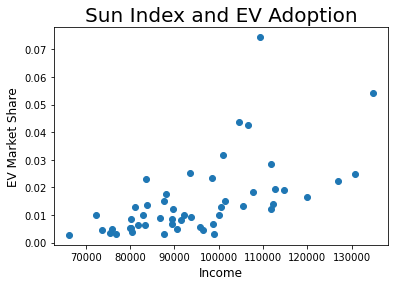

In [36]:
# We are now ready to run some analysis
plt.scatter(filescombined['Average Income'], filescombined['EV_BEV_PHEV_Share'])
plt.xlabel('Income', fontsize=12)
plt.ylabel('EV Market Share', fontsize=12)
plt.title('Sun Index and EV Adoption', fontsize=20)
plt.show()

In [37]:
# We want to plot some bar chart to see the relationship between Income and EV market share

def income_tier(x): 
    if x < 80000: 
        return 'a.< 80K'
    elif x < 100000:
        return 'b.<100K'
    elif x < 120000:
        return 'c.<120K'
    else:
        return 'd.120K+'

filescombined['income_rank']=filescombined['Average Income'].apply(income_tier)

In [38]:
# calculate EV market share by income rank
filescombined.groupby('income_rank')['EV_BEV_PHEV_Share'].mean()

income_rank
a.< 80K    0.004900
b.<100K    0.010158
c.<120K    0.024773
d.120K+    0.033833
Name: EV_BEV_PHEV_Share, dtype: float64

Text(0.5, 1.0, 'Income and EV Adoption')

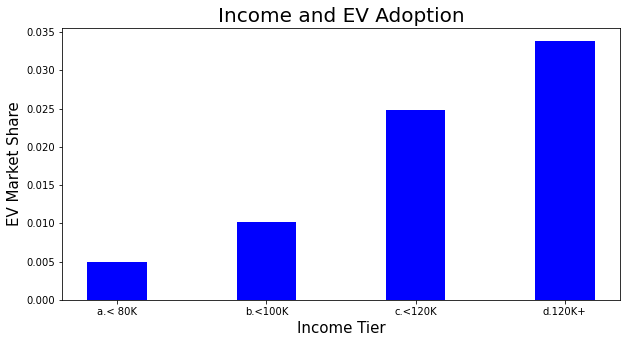

In [39]:
# plot the above summary statistics
fig=plt.figure(figsize=(10, 5))

income_ev=filescombined.groupby('income_rank')['EV_BEV_PHEV_Share'].mean().reset_index().rename(columns={'EV_BEV_PHEV_Share':'EV Market Share'})

plt.bar(income_ev['income_rank'], income_ev['EV Market Share'], color='blue', width=0.4)
plt.xlabel("Income Tier", fontsize=15)
plt.ylabel('EV Market Share', fontsize=15)
plt.title("Income and EV Adoption", fontsize=20)

### Question 2: Is EV adoption impacted by solar potential?

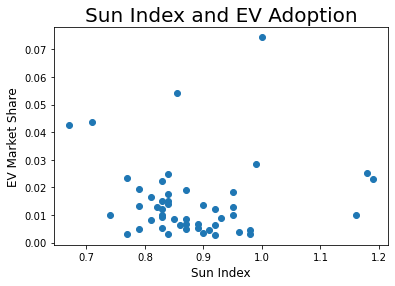

In [40]:
plt.scatter(filescombined['Sun Index'], filescombined['EV_BEV_PHEV_Share'])
plt.xlabel('Sun Index', fontsize=12)
plt.ylabel('EV Market Share', fontsize=12)
plt.title('Sun Index and EV Adoption', fontsize=20)
plt.show()

In [41]:
def solar_index(x):
    if x < 0.8:
        return 'a.<0.8'
    elif x < 0.9:
        return 'b.<0.9'
    elif x < 1:
        return 'c.<1.0'
    else:
        return 'd.1+'
    
    
filescombined['Sun Index Tier']=filescombined['Sun Index'].apply(solar_index)

In [42]:
filescombined.groupby('Sun Index Tier')['EV_BEV_PHEV_Share'].mean()

Sun Index Tier
a.<0.8    0.020088
b.<0.9    0.013343
c.<1.0    0.009550
d.1+      0.028367
Name: EV_BEV_PHEV_Share, dtype: float64

Text(0.5, 1.0, 'Sun Index and EV Adoption')

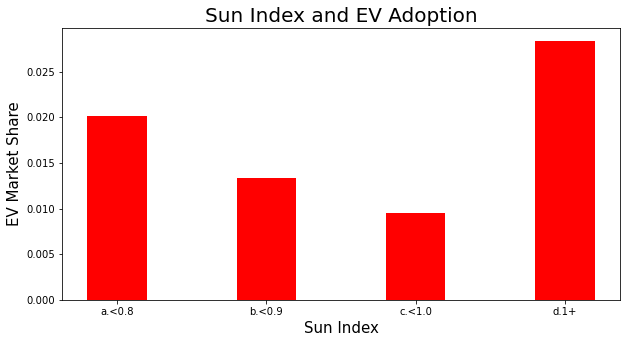

In [43]:
fig=plt.figure(figsize=(10, 5))

income_ev=filescombined.groupby('Sun Index Tier')['EV_BEV_PHEV_Share'].mean().reset_index().rename(columns={'EV_BEV_PHEV_Share':'EV Market Share'})

plt.bar(income_ev['Sun Index Tier'], income_ev['EV Market Share'], color='red', width=0.4)
plt.xlabel("Sun Index", fontsize=15)
plt.ylabel('EV Market Share', fontsize=15)
plt.title("Sun Index and EV Adoption", fontsize=20)

### Question 3: What if we plot Income and Sun Index in one chart?
### We can use a heatmap to show this.  For generating a heatmap, we need to make a 2x2 pivot table first

In [44]:
income_sunindex_EV=pd.pivot_table(filescombined, index='Sun Index Tier', columns='income_rank', values='EV_BEV_PHEV_Share')
income_sunindex_EV

income_rank,a.< 80K,b.<100K,c.<120K,d.120K+
Sun Index Tier,,,,
a.<0.8,0.004900,0.012200,0.029800,NaN
b.<0.9,0.005400,0.008392,0.014186,0.033833
c.<1.0,0.003475,0.009100,0.023500,NaN
d.1+,0.010100,0.018000,0.053050,NaN


<AxesSubplot:xlabel='income_rank', ylabel='Sun Index Tier'>

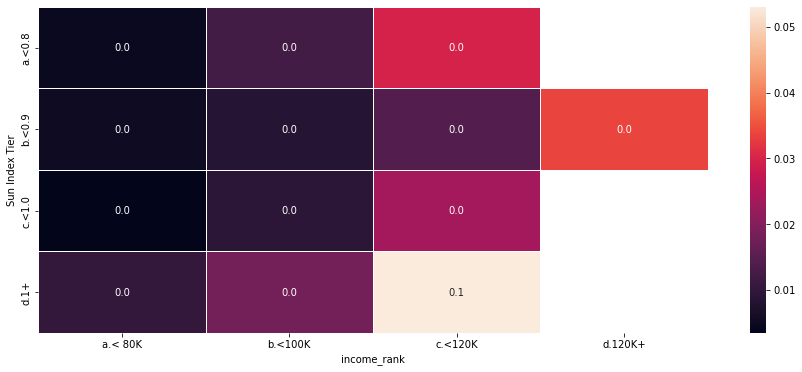

In [45]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(income_sunindex_EV, annot=True, fmt=".1f", linewidths=.5, ax=ax)

### Question 4: Are there other factors correlated with EV adoption?

In [46]:
filescombined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   level_0                  51 non-null     float64
 1   Population Rank          51 non-null     float64
 2   State                    51 non-null     object 
 3   Population in 2021       51 non-null     float64
 4   Population in 2020       51 non-null     float64
 5   Total Size Rank          51 non-null     float64
 6   total_size               51 non-null     float64
 7   Land Size Rank           51 non-null     float64
 8   land area                51 non-null     float64
 9   Water Area Rank          51 non-null     float64
 10  water area               51 non-null     float64
 11  Population Density Rank  51 non-null     float64
 12  Population Density       51 non-null     float64
 13  percent_land_area        51 non-null     float64
 14  index                    48 

In [47]:
filescombined.columns.tolist()

['level_0',
 'Population Rank',
 'State',
 'Population in 2021',
 'Population in 2020',
 'Total Size Rank',
 'total_size',
 'Land Size Rank',
 'land area',
 'Water Area Rank',
 'water area',
 'Population Density Rank',
 'Population Density',
 'percent_land_area',
 'index',
 'Solar Potential Rank',
 'Sun Index',
 'State Abbreviation',
 'Average Income',
 '2019_BEV_Sales',
 '2019_BEV_Market_Share',
 '2019_PHEV_Sales',
 '2019_PHEV_Market_Share',
 'EV_BEV_PHEV_Share',
 'EV_BEV_PHEV_Sales',
 'income_rank',
 'Sun Index Tier']

In [48]:
# select some columns for correlation analysis
selected_columns=[
 'Population in 2021',
 'total_size',
 'land area',
 'water area',
 'Population Density',
 'percent_land_area',
 'Sun Index',
 'State Abbreviation',
 'Average Income',
 '2019_PHEV_Market_Share']

In [49]:
# We want to find whether some other factors/variables have impact on EV adoption
# For explore this, we find the correlation of EV adoption with other factors/variables

df_selected_columns=filescombined[selected_columns]

In [50]:
# get a table of correlation
# To find the correlation of EV adoption with other variables, we only need to look at the last row. 
df_selected_columns.corr()

,Population in 2021,total_size,land area,water area,Population Density,percent_land_area,Sun Index,Average Income,2019_PHEV_Market_Share
Population in 2021,1.000000,0.142196,0.153952,0.044508,-0.081569,-0.021791,0.104077,0.146280,0.371603
total_size,0.142196,1.000000,0.995809,0.832569,-0.164013,0.108175,0.481837,-0.090295,-0.048895
land area,0.153952,0.995809,1.000000,0.778418,-0.174501,0.174636,0.513954,-0.106161,-0.046151
water area,0.044508,0.832569,0.778418,1.000000,-0.068936,-0.315275,-0.170061,0.022742,-0.056266
Population Density,-0.081569,-0.164013,-0.174501,-0.068936,1.000000,-0.130597,-0.084750,0.447854,0.455053
percent_land_area,-0.021791,0.108175,0.174636,-0.315275,-0.130597,1.000000,0.344949,-0.313956,-0.145353
Sun Index,0.104077,0.481837,0.513954,-0.170061,-0.084750,0.344949,1.000000,-0.292612,-0.065536
Average Income,0.146280,-0.090295,-0.106161,0.022742,0.447854,-0.313956,-0.292612,1.000000,0.562919
2019_PHEV_Market_Share,0.371603,-0.048895,-0.046151,-0.056266,0.455053,-0.145353,-0.065536,0.562919,1.000000


<AxesSubplot:>

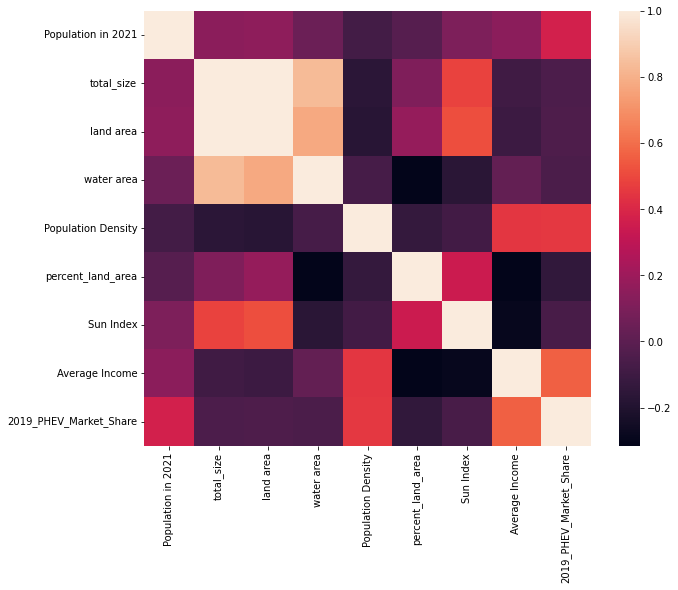

In [51]:
# We now plot the correlations
fig=plt.figure(figsize=(10, 8))
sns.heatmap(df_selected_columns.corr())

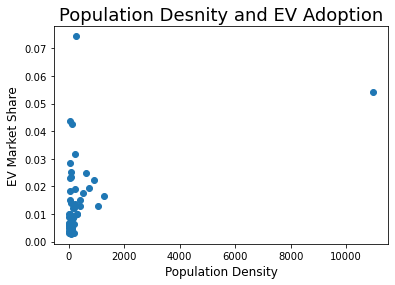

In [52]:
### population density seems to be correlated with EV adoption, so let's plot these two
plt.scatter(filescombined['Population Density'], filescombined['EV_BEV_PHEV_Share'])
plt.xlabel('Population Density', fontsize=12)
plt.ylabel('EV Market Share', fontsize=12)
plt.title('Population Desnity and EV Adoption', fontsize=18)
plt.show()

In [53]:
# find out what the outlier is
# I suspect it to be Washington DC
filescombined[filescombined['Population Density'] > 10000][['State', 'State Abbreviation']]

,State,State Abbreviation
8,District of Columbia,DC


### Washington DC is a city.  It does not have suburb or rural area, so its population density greatly exceeds all US states. 

In [54]:
# Let' plot a regression line to reveal the relationship between Population Density and EV Adoption
# To do this, we need to install the package altair
# Once it has been installed, you do not need to install it again. 
!pip install altair

In [55]:
import altair as alt

sc_plot=alt.Chart(filescombined).mark_point().encode(
    x="Population Density",
    y="EV_BEV_PHEV_Share"
)

sc_plot + sc_plot.transform_regression("Population Density", "EV_BEV_PHEV_Share").mark_line()

alt.LayerChart(...)

### The above line is similar to high-school math: y=a+bx.  b signifies how much x impacts on y. 
* In our example, it is EV_Adoption=Intercept+b*Population_Density.  The coefficient b is the impact of Population Density on EV adoption. 
* If b > 0, Population Density has a positive impact on EV adoption.
* if b < 0, Population Density has a negative impact on EV adoption. 
* if b=0, Population Density has no (or zero) impact on EV adoption. 

In [56]:
# We see an outlier on the very right.  
# Because of this outlier, the relationship between Population Density and EV adoption is not revealed.
# We need to exclude this data point (outlier) in order to see some trend. 
filescombined_no_outlier=filescombined[filescombined['Population Density'] < 4000]

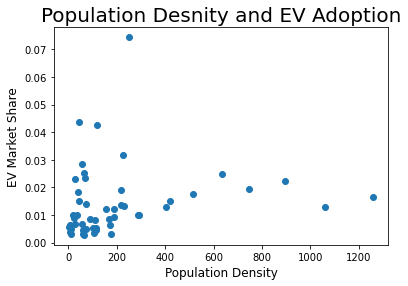

In [57]:
plt.scatter(filescombined_no_outlier['Population Density'], filescombined_no_outlier['EV_BEV_PHEV_Share'])
plt.xlabel('Population Density', fontsize=12)
plt.ylabel('EV Market Share', fontsize=12)
plt.title('Population Desnity and EV Adoption', fontsize=20)
plt.show()

In [58]:
sc_plot=alt.Chart(filescombined_no_outlier).mark_point().encode(
    x="Population Density",
    y="EV_BEV_PHEV_Share"
)

sc_plot + sc_plot.transform_regression("Population Density", "EV_BEV_PHEV_Share").mark_line()

alt.LayerChart(...)

In [59]:
# Let plot solar potential (Sun Index) and EV adoption
sc_plot=alt.Chart(filescombined_no_outlier).mark_point().encode(
    x="Sun Index",
    y="EV_BEV_PHEV_Share"
)

sc_plot + sc_plot.transform_regression("Sun Index", "EV_BEV_PHEV_Share").mark_line()

alt.LayerChart(...)

### The regression line above is practically flat, ie., y=a+0x.  It means solar potential has no impact on EV adoption. 

In [60]:
def pop_density(x):
    if x < 50:
        return 'a.<50' 
    elif x < 100:
        return 'b.<100'
    elif x < 200:
        return 'c.<200'
    else:
        return 'd.200+'
    
filescombined['population density tier']=filescombined['Population Density'].apply(pop_density)

In [61]:
filescombined.groupby('population density tier')['EV_BEV_PHEV_Share'].mean()

population density tier
a.<50     0.012362
b.<100    0.011536
c.<200    0.010518
d.200+    0.023013
Name: EV_BEV_PHEV_Share, dtype: float64

Text(0.5, 1.0, 'Population Density and EV Adoption')

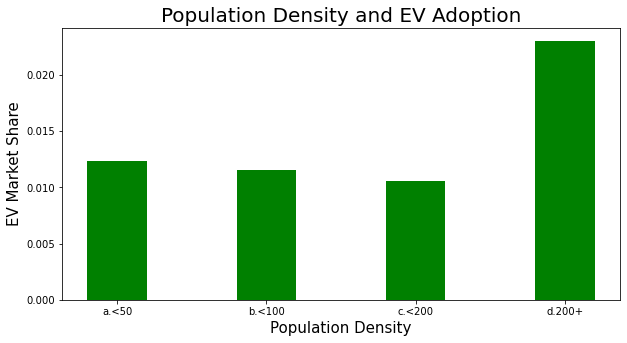

In [62]:
fig=plt.figure(figsize=(10, 5))

income_ev=filescombined.groupby('population density tier')['EV_BEV_PHEV_Share'].mean().reset_index().rename(columns={'EV_BEV_PHEV_Share':'EV Market Share'})

plt.bar(income_ev['population density tier'], income_ev['EV Market Share'], color='green', width=0.4)
plt.xlabel("Population Density", fontsize=15)
plt.ylabel('EV Market Share', fontsize=15)
plt.title("Population Density and EV Adoption", fontsize=20)

In [63]:
sc_plot=alt.Chart(filescombined_no_outlier).mark_point().encode(
    x="Average Income",
    y="EV_BEV_PHEV_Share"
)

sc_plot + sc_plot.transform_regression("Average Income", "EV_BEV_PHEV_Share").mark_line()

alt.LayerChart(...)

# Part 7: Data for Charging Stations

In [64]:
charging_station=pd.read_csv(path+'alt_fuel_stations (Sep 7 2022).csv')

C:\Users\aleci\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,20,31,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [65]:
charging_station.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,NaN,Long Beach,CA,90803,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
charging_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54352 entries, 0 to 54351
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    54352 non-null  object 
 1   Station Name                      54352 non-null  object 
 2   Street Address                    54319 non-null  object 
 3   Intersection Directions           2626 non-null   object 
 4   City                              54352 non-null  object 
 5   State                             54352 non-null  object 
 6   ZIP                               54352 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     51048 non-null  object 
 9   Status Code                       54352 non-null  object 
 10  Expected Date                     0 non-null      float64
 11  Groups With Access Code           54352 non-null  object 
 12  Acce

In [67]:
charging_station.groupby('State')['Station Name'].count()

State
AK       56
AL      319
AR      205
AZ      958
CA    15474
CO     1789
CT      564
DC      310
DE      133
FL     2924
GA     1639
HI      390
IA      305
ID      151
IL     1144
IN      391
KS      500
KY      254
LA      179
MA     2412
MD     1399
ME      406
MI     1132
MN      594
MO     1043
MS      113
MT       98
MX        1
NC     1211
ND       79
NE      215
NH      191
NJ      867
NM      208
NV      517
NY     3403
OH     1149
OK      336
ON        5
OR     1024
PA     1323
PR        6
QC        2
RI      301
SC      432
SD       68
TN      705
TX     2529
UT      803
VA     1265
VT      343
WA     1837
WI      455
WV      120
WY       75
Name: Station Name, dtype: int64

In [68]:
charging_station=charging_station.rename(columns={'State':'State Abbreviation'})

In [69]:
charging_station_summary=charging_station.groupby('State Abbreviation')['Station Name'].count().reset_index().rename(columns={'Station Name': 'Charging Station Count'})
charging_station_summary.head()

,State Abbreviation,Charging Station Count
0,AK,56
1,AL,319
2,AR,205
3,AZ,958
4,CA,15474


In [70]:
# merge with previously combined file
filescombined2=pd.merge(filescombined, charging_station_summary, on='State Abbreviation', how='left')

In [71]:
# calculate EV/Charging_station ratio.  
filescombined2['EV_station_availability']=filescombined2['Charging Station Count']/filescombined2['EV_BEV_PHEV_Sales']

In [72]:
filescombined2['EV_station_availability'].describe()

count    51.000000
mean      0.298210
std       0.141028
min       0.091911
25%       0.182744
50%       0.280669
75%       0.398327
max       0.692982
Name: EV_station_availability, dtype: float64

In [73]:
selected_columns=[
 'Population in 2021',
 'total_size',
 'land area',
 'water area',
 'Population Density',
 'percent_land_area',
 'Sun Index',
 'State Abbreviation',
 'Average Income',
 '2019_PHEV_Market_Share',
'EV_station_availability']

df_selected_columns=filescombined2[selected_columns]

<AxesSubplot:>

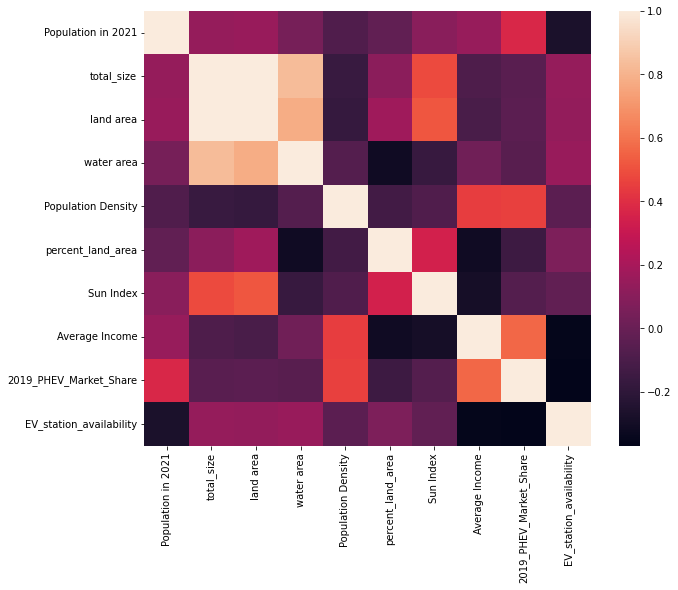

In [74]:
fig=plt.figure(figsize=(10, 8))
sns.heatmap(df_selected_columns.corr())

## We now plot EV Market Share, Charging Station Availability and EV sales together.
* The bubble size represents EV size.
* Bubble chart is a common way to visualize data in three dimensions.

In [75]:
# import plotly.graph_objects as go

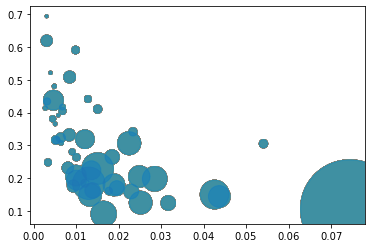

In [76]:
fig, ax = plt.subplots(facecolor='w')

for key, row in filescombined2.iterrows():
    ax.scatter(filescombined2['EV_BEV_PHEV_Share'], filescombined2['EV_station_availability'], 
               s=filescombined2['EV_BEV_PHEV_Sales']/15, alpha=.5)

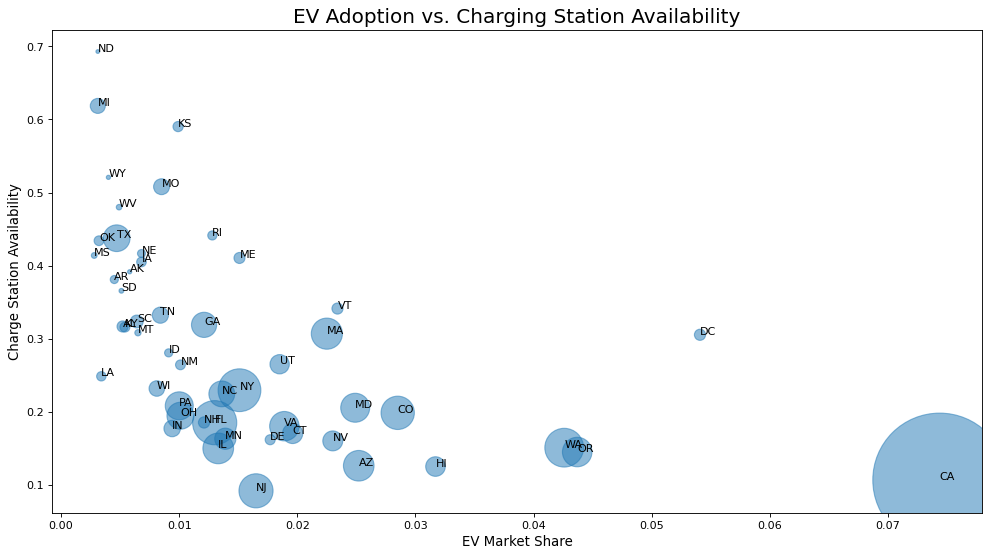

In [77]:
# Plot the same graph by using matplotlib
bubble_size_adjust=10
filescombined2['EV_sales']=filescombined2['EV_BEV_PHEV_Sales']/bubble_size_adjust

from matplotlib.pyplot import figure

figure(figsize=(15, 8), dpi=80)

X=filescombined2['EV_BEV_PHEV_Share']
Y=filescombined2['EV_station_availability']
bubble_size=filescombined2['EV_sales']
annotations=filescombined2['State Abbreviation']

plt.scatter(X, Y, 
            s=bubble_size,
            alpha=0.5)
plt.xlabel("EV Market Share", size=12)
plt.ylabel("Charge Station Availability", size=12)
plt.title("EV Adoption vs. Charging Station Availability", size=18)

for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))

plt.show()

# Part 8: Does Political Party Affiliation Impact EV Adoption?

In [78]:
party_aff=pd.read_excel(path+'party_affiliation_by_state.xls')
party_aff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   State                                                50 non-null     object
 1   2020 presidential election                           50 non-null     object
 2   Governor                                             50 non-null     object
 3   State Senate                                         50 non-null     object
 4   State House                                          49 non-null     object
 5   Senior US Senator                                    50 non-null     object
 6   Junior US Senator                                    50 non-null     object
 7   U.S. House of Representatives                        50 non-null     object
 8   Party registration or identification (% as of 2020)  50 non-null     object
dtypes:

In [79]:
# The following weights are assigned arbitrarily.  They sum up to 1. Please note that weight_US senator will be used twice. 
weight_presidential=0.5
weight_governor=0.14
weight_state_senate=0.1
weight_state_house=0.1
weight_US_senator=0.04   ## It will used twice since each state will elect two senators 
weight_US_house=0.08

In [80]:
# determine the party affiliation at each level
# For presidential election, Nebraska and Maine do not use electoral college as other states.  Both were considered as an even split between Republican and Democrat for the ease of data use. 
party_aff['Presidential_election']=np.where((party_aff['2020 presidential election'].str.contains('Republican')) & (party_aff['2020 presidential election'].str.contains('Democratic')), 0.5,
                                            np.where(party_aff['2020 presidential election'].str.contains('Democratic'), 1, 0))

In [81]:
party_aff['State Senate']=party_aff['State Senate'].astype('string')
party_aff['State House']=party_aff['State House'].astype('string')
party_aff['U.S. House of Representatives']=party_aff['U.S. House of Representatives'].astype('string')
party_aff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   State                                                50 non-null     object 
 1   2020 presidential election                           50 non-null     object 
 2   Governor                                             50 non-null     object 
 3   State Senate                                         50 non-null     string 
 4   State House                                          49 non-null     string 
 5   Senior US Senator                                    50 non-null     object 
 6   Junior US Senator                                    50 non-null     object 
 7   U.S. House of Representatives                        50 non-null     string 
 8   Party registration or identification (% as of 2020)  50 non-null     obj

In [82]:
# need to correct for Nebraska
party_aff['State Senate']=np.where(party_aff['State']=='Nebraska', 'Republican', party_aff['State Senate'])
party_aff['State House']=np.where(party_aff['State']=='Nebraska', 'Republican', party_aff['State House'])

### We start to calculate the score of political party affiliation
* If voting for Republican, then 1. If voting for Democrat, then 0. 
* The higher the final score, the redder a state is (more Republican). 
* The lower the final score, the bluer a state is (more Democrat). 

In [83]:
def assign_aff(x, y):
    party_aff[y]=np.where(party_aff[x].astype(str).str.contains('Democratic'), 1, 
                          np.where(party_aff[x].astype(str).str.contains('Republican'), 0, 0.5))


assign_aff('Governor', 'Gubernatorial_election')
assign_aff('State Senate', 'state_senate_election')
assign_aff('State House', 'state_house_election')
assign_aff('Senior US Senator', 'senior_US_senator_election')
assign_aff('Junior US Senator', 'junior_US_senator_election')
assign_aff('U.S. House of Representatives', 'US_house_election')

In [84]:
# We are now ready to calculate the color of each state
party_aff['party_score']=party_aff['Presidential_election']*weight_presidential+ \
                         party_aff['Gubernatorial_election']*weight_governor+ \
                         party_aff['state_senate_election']*weight_state_senate+ \
                         party_aff['state_house_election']*weight_state_house+ \
                         party_aff['senior_US_senator_election']*weight_US_senator+ \
                         party_aff['junior_US_senator_election']*weight_US_senator+ \
                         party_aff['US_house_election']*weight_US_house

In [85]:
party_aff.head()

,State,2020 presidential election,Governor,State Senate,State House,Senior US Senator,Junior US Senator,U.S. House of Representatives,Party registration or identification (% as of 2020),Presidential_election,Gubernatorial_election,state_senate_election,state_house_election,senior_US_senator_election,junior_US_senator_election,US_house_election,party_score
0,Alabama,Republican,Republican,Republican 27–8,Republican 77–28,Republican,Republican,Republican 6–1,Republican\n52–35[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,Alaska,Republican,Republican,Republican 13–7,Coalition 23–17[c],Republican,Republican,Democratic,Republican\n24–13[d][9],0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.13
2,Arizona,Democratic,Republican,Republican 16–14,Republican 31–29,Democratic,Democratic,Democratic 5–4,Republican\n35–33[d][10],1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.66
3,Arkansas,Republican,Republican,Republican 28–7,Republican 77–23,Republican,Republican,Republican 4,Republican\n48–35[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,California,Democratic,Democratic,Democratic 31–9,Democratic 59–19–1,Democratic,Democratic,Democratic 42–11,Democratic\n45–24[d][11],1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00


In [86]:
party_aff.sort_values(by='party_score', inplace=True)
party_aff[['State', 'party_score']].head(60)

,State,party_score
0,Alabama,0.00
43,Utah,0.00
42,Texas,0.00
41,Tennessee,0.00
40,South Dakota,0.00
39,South Carolina,0.00
35,Oklahoma,0.00
33,North Dakota,0.00
23,Mississippi,0.00
14,Iowa,0.00


In [87]:
# Washington DC is missing from the table, but the voters there are mostly Democrats, so we will add the following
column_names=['State', 'party_score']
record_features="District of Columbia, 1"
features=record_features.split(',')

DC_data=pd.DataFrame([features], columns=column_names)
DC_data['party_score']=DC_data['party_score'].astype(float)
DC_data.head()

,State,party_score
0,District of Columbia,1.0


In [88]:
DC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        1 non-null      object 
 1   party_score  1 non-null      float64
dtypes: float64(1), object(1)
memory usage: 144.0+ bytes


In [89]:
# We now append DC_data to the previous file
party_aff2=party_aff.append(DC_data).reset_index()
party_aff2.head(60)

,index,State,2020 presidential election,Governor,State Senate,State House,Senior US Senator,Junior US Senator,U.S. House of Representatives,Party registration or identification (% as of 2020),Presidential_election,Gubernatorial_election,state_senate_election,state_house_election,senior_US_senator_election,junior_US_senator_election,US_house_election,party_score
0,0,Alabama,Republican,Republican,Republican 27–8,Republican 77–28,Republican,Republican,Republican 6–1,Republican\n52–35[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,43,Utah,Republican,Republican,Republican 23–6,Republican 58–17,Republican,Republican,Republican 4,Republican\n51–15[d][39],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,42,Texas,Republican,Republican,Republican 18–13,Republican 83–67,Republican,Republican,Republican 23–13,Republican\n42–39[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,41,Tennessee,Republican,Republican,Republican 27–6,Republican 73–26,Republican,Republican,Republican 7–2,Republican\n48–35[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,40,South Dakota,Republican,Republican,Republican 32–3,Republican 62–8,Republican,Republican,Republican,Republican\n48–28[d][38],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5,39,South Carolina,Republican,Republican,Republican 30–16,Republican 81–43,Republican,Republican,Republican 6–1,Republican\n47-37[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
6,35,Oklahoma,Republican,Republican,Republican 39–9,Republican 82–19,Republican,Republican,Republican 5,Republican\n48–35[d][34],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
7,33,North Dakota,Republican,Republican,Republican 40–7,Republican 80–14,Republican,Republican,Republican,Republican\n55-30[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
8,23,Mississippi,Republican,Republican,Republican 36–16,Republican 75–44–3[e],Republican,Republican,Republican 3–1,Republican\n48–36[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
9,14,Iowa,Republican,Republican,Republican 32–18,Republican 59–41,Republican,Republican,Republican 3–1,Democratic\n33–32[d][17],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [90]:
# assign color
def party_aff_color(x):
    if x < 0.2:
        return 0
    elif x < 0.4:
        return 1
    elif x < 0.78:
        return 2
    else:
        return 3
    
party_aff2['state_party_aff_color']=party_aff2['party_score'].apply(party_aff_color)

In [91]:
party_aff2.groupby('state_party_aff_color')['State'].count()

state_party_aff_color
0    24
1     1
2     8
3    18
Name: State, dtype: int64

In [92]:
party_aff2.head(55)

,index,State,2020 presidential election,Governor,State Senate,State House,Senior US Senator,Junior US Senator,U.S. House of Representatives,Party registration or identification (% as of 2020),Presidential_election,Gubernatorial_election,state_senate_election,state_house_election,senior_US_senator_election,junior_US_senator_election,US_house_election,party_score,state_party_aff_color
0,0,Alabama,Republican,Republican,Republican 27–8,Republican 77–28,Republican,Republican,Republican 6–1,Republican\n52–35[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
1,43,Utah,Republican,Republican,Republican 23–6,Republican 58–17,Republican,Republican,Republican 4,Republican\n51–15[d][39],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
2,42,Texas,Republican,Republican,Republican 18–13,Republican 83–67,Republican,Republican,Republican 23–13,Republican\n42–39[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
3,41,Tennessee,Republican,Republican,Republican 27–6,Republican 73–26,Republican,Republican,Republican 7–2,Republican\n48–35[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
4,40,South Dakota,Republican,Republican,Republican 32–3,Republican 62–8,Republican,Republican,Republican,Republican\n48–28[d][38],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
5,39,South Carolina,Republican,Republican,Republican 30–16,Republican 81–43,Republican,Republican,Republican 6–1,Republican\n47-37[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
6,35,Oklahoma,Republican,Republican,Republican 39–9,Republican 82–19,Republican,Republican,Republican 5,Republican\n48–35[d][34],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
7,33,North Dakota,Republican,Republican,Republican 40–7,Republican 80–14,Republican,Republican,Republican,Republican\n55-30[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
8,23,Mississippi,Republican,Republican,Republican 36–16,Republican 75–44–3[e],Republican,Republican,Republican 3–1,Republican\n48–36[b],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
9,14,Iowa,Republican,Republican,Republican 32–18,Republican 59–41,Republican,Republican,Republican 3–1,Democratic\n33–32[d][17],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0


In [93]:
# export the file to be used by Project 1
party_aff2.to_csv(path+'party_affiliation_by_state.csv')

In [94]:
# Now merge with the file used in Part V
filescombined3=pd.merge(filescombined2, party_aff2[['State', 'party_score', 'state_party_aff_color']], on='State', how='left')

In [95]:
filescombined3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   level_0                  51 non-null     float64
 1   Population Rank          51 non-null     float64
 2   State                    51 non-null     object 
 3   Population in 2021       51 non-null     float64
 4   Population in 2020       51 non-null     float64
 5   Total Size Rank          51 non-null     float64
 6   total_size               51 non-null     float64
 7   Land Size Rank           51 non-null     float64
 8   land area                51 non-null     float64
 9   Water Area Rank          51 non-null     float64
 10  water area               51 non-null     float64
 11  Population Density Rank  51 non-null     float64
 12  Population Density       51 non-null     float64
 13  percent_land_area        51 non-null     float64
 14  index                    48 

In [96]:
# Is EV adoption correlated with the party affiliation of a state?
np.corrcoef(filescombined3['EV_BEV_PHEV_Share'], filescombined3['party_score'])

array([[1.        , 0.62870665],
       [0.62870665, 1.        ]])

### The correlation is 0.63.  This suggests that bluer a state, the high EV adoption. 
* That is, EV adoption is correlated with party affiliation of a state. 
* A more Democratic-leaning state is generally more encouraging to EV adoption. 

## We now replot the graph
### We now analyze at least three variables together.  This is multivariate analysis because we will use the following four variables together:
* EV adoption 
* Charging Station Availability
* EV sales
* Political Party Affiliation

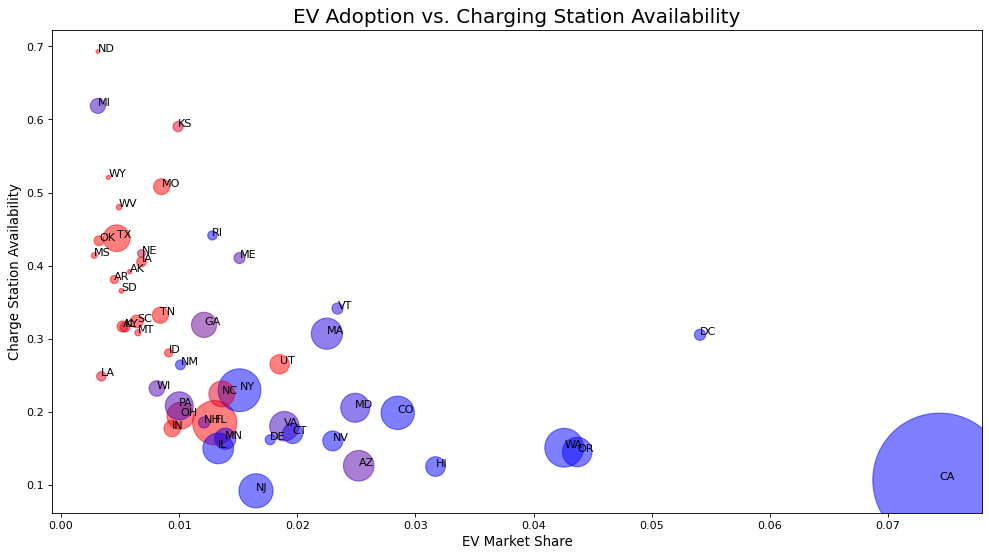

In [97]:
import matplotlib.colors as mcol
import matplotlib.cm as cm

bubble_size_adjust=10
filescombined3['EV_sales']=filescombined3['EV_BEV_PHEV_Sales']/bubble_size_adjust


from matplotlib.pyplot import figure

figure(figsize=(15, 8), dpi=80)  

X=filescombined3['EV_BEV_PHEV_Share']
Y=filescombined3['EV_station_availability']
bubble_size=filescombined3['EV_sales']
annotations=filescombined3['State Abbreviation']
state_color=filescombined3['party_score']    # added this

# The following line of code provides a continuous spectrum from red to blue
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["red","blue"])

plt.scatter(X, Y, 
            s=bubble_size,
            c=state_color,   # added this
            cmap=cm1,    # added this
            alpha=0.5)
plt.xlabel("EV Market Share", size=12)
plt.ylabel("Charge Station Availability", size=12)
plt.title("EV Adoption vs. Charging Station Availability", size=18)

for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))

plt.show()

### Insights from the bubble chart:
* Blue states in general have high EV adoption rate. 
* However, blue states also need to install more EV charging station. 

# Part 9: A Simple Regression Analysis
* Regression is the most common method of multivariate analysis. 
* We want to find out how the following factors impacts EV Adoption:
    * Population
    * Population density
    * Solar potential (as suggested by Sun Index)
    * Landsize
    * Income
    * Affiliation to a political party

In [98]:
import statsmodels.api as sm

# Alaska and Hawaii do not have data for solar potential (Sun Index), so we exclude them from modeling.
filescombined4=filescombined3[~(filescombined3['State Abbreviation'].str.strip().isin(['HI', 'AK']))]
filescombined4['income log']=np.log(filescombined4['Average Income'])

# define response/outcome variable
y=filescombined4['EV_BEV_PHEV_Share']

# define explanatory variable
x=filescombined4[['Population in 2020', 'Population Density', 'Sun Index', 'total_size', 
                 'income log', 'party_score']]

# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      EV_BEV_PHEV_Share   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     10.06
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           7.00e-07
Time:                        11:24:08   Log-Likelihood:                 162.21
No. Observations:                  49   AIC:                            -310.4
Df Residuals:                      42   BIC:                            -297.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1817      0

C:\Users\aleci\AppData\Local\Temp/ipykernel_8508/4112891967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filescombined4['income log']=np.log(filescombined4['Average Income'])
C:\Users\aleci\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [99]:
# Alaska and Hawaii do not have data for solar potential (Sun Index), so we exclude them from modeling.
filescombined4=filescombined3[~(filescombined3['State Abbreviation'].str.strip().isin(['HI', 'AK']))]
filescombined4['income log']=np.log(filescombined4['Average Income'])

# define response/outcome variable
y=filescombined4['EV_BEV_PHEV_Share']

# define explanatory variable
x=filescombined4[['Population in 2020', 'Population Density', 'party_score']]

# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      EV_BEV_PHEV_Share   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     19.64
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           2.76e-08
Time:                        11:24:08   Log-Likelihood:                 160.88
No. Observations:                  49   AIC:                            -313.8
Df Residuals:                      45   BIC:                            -306.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0022      0

C:\Users\aleci\AppData\Local\Temp/ipykernel_8508/771119554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filescombined4['income log']=np.log(filescombined4['Average Income'])
C:\Users\aleci\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [100]:
filescombined4.describe().T

,count,mean,std,min,25%,50%,75%,max
level_0,49.0,2.577551e+01,1.461202e+01,0.000000,1.400000e+01,2.600000e+01,3.800000e+01,5.000000e+01
Population Rank,49.0,2.526531e+01,1.467960e+01,1.000000,1.300000e+01,2.500000e+01,3.700000e+01,5.100000e+01
Population in 2021,49.0,6.728970e+06,7.465296e+06,578803.000000,1.963692e+06,4.624047e+06,7.738692e+06,3.923784e+07
Population in 2020,49.0,6.713475e+06,7.471039e+06,576851.000000,1.961504e+06,4.657757e+06,7.705281e+06,3.953822e+07
Total Size Rank,49.0,2.616327e+01,1.453064e+01,2.000000,1.400000e+01,2.600000e+01,3.800000e+01,5.100000e+01
total_size,49.0,6.368217e+04,4.806299e+04,68.340000,3.641955e+04,5.627281e+04,8.356895e+04,2.685965e+05
Land Size Rank,49.0,2.608163e+01,1.442197e+01,2.000000,1.400000e+01,2.600000e+01,3.800000e+01,5.100000e+01
land area,49.0,6.030927e+04,4.709671e+04,61.050000,3.582611e+04,5.392476e+04,7.962674e+04,2.612317e+05
Water Area Rank,49.0,2.677551e+01,1.459633e+01,2.000000,1.500000e+01,2.700000e+01,3.900000e+01,5.100000e+01
water area,49.0,3.379278e+03,6.132380e+03,7.290000,5.934400e+02,1.368360e+03,3.284840e+03,4.017461e+04


In [101]:
file_dl=filescombined4.copy()

In [102]:
file_dl.to_csv(path+"file_dl.csv")

# Insights from regression analysis
### Here we need to look at two things: 
* coef: sign of coefficient. If > 0, the variable has a positive effect on y.  If < 0, the variable has a negative effect on y.
* P>|t|: if P < 0.05, it means the variable has statistically significant impact on y.  If P value is too large, the variable has no impact on y. 
### Population, Population Density and party_score all have positive impact on EV adoption. 
### Income has a positive effect, but P=0.218.  This suggests the effect is not statistically significant, or the impact is not as big as we expected.
### Solar potential has not effect on EV adoption. 

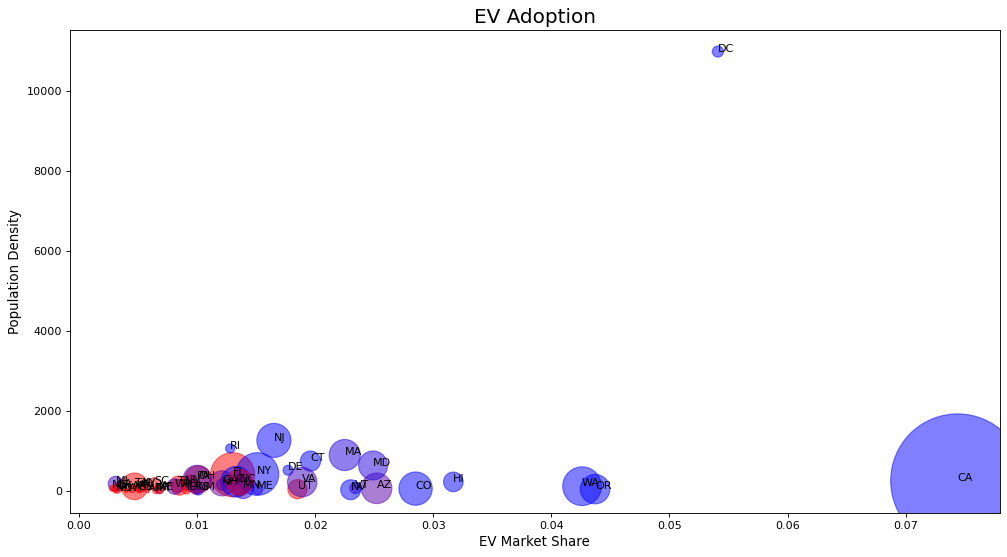

In [103]:
bubble_size_adjust=10
filescombined3['EV_sales']=filescombined3['EV_BEV_PHEV_Sales']/bubble_size_adjust


from matplotlib.pyplot import figure

figure(figsize=(15, 8), dpi=80)  

X=filescombined3['EV_BEV_PHEV_Share']
Y=filescombined3['Population Density']
bubble_size=filescombined3['EV_sales']
annotations=filescombined3['State Abbreviation']
state_color=filescombined3['party_score']    # added this

# The following line of code provides a continuous spectrum from red to blue
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["red","blue"])

plt.scatter(X, Y, 
            s=bubble_size,
            c=state_color,   # added this
            cmap=cm1,    # added this
            alpha=0.5)
plt.xlabel("EV Market Share", size=12)
plt.ylabel("Population Density", size=12)
plt.title("EV Adoption", size=18)

for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))

plt.show()

* The population density in DC is too high.  It behaves like an outlier and suppresses the pattern by all other states.
* Let's redraw the graph by excluding DC.

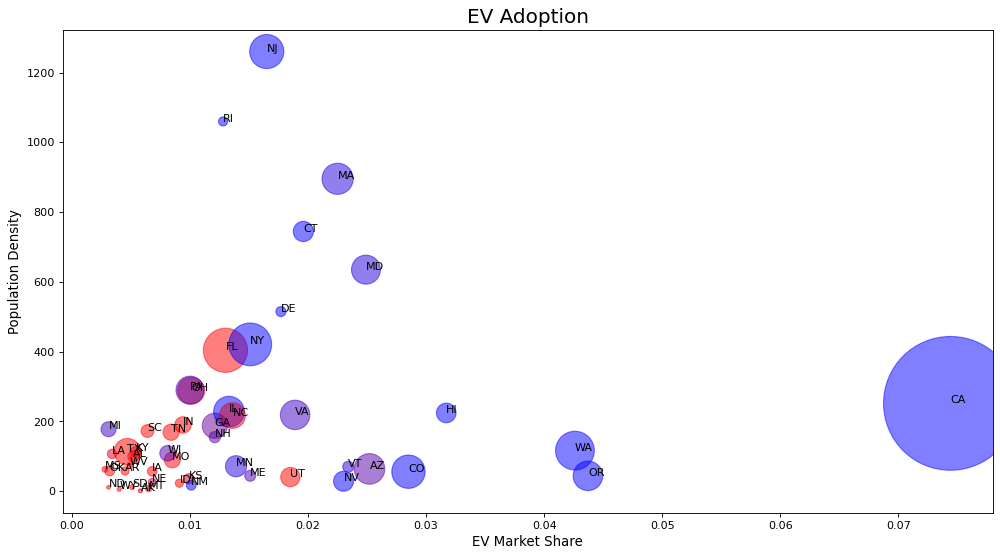

In [104]:
bubble_size_adjust=10
filescombined4=filescombined3.drop('level_0', axis=1)
filescombined4=filescombined4[filescombined4['State Abbreviation'] != 'DC'].reset_index()
filescombined4['EV_sales']=filescombined4['EV_BEV_PHEV_Sales']/bubble_size_adjust


from matplotlib.pyplot import figure

figure(figsize=(15, 8), dpi=80)  

X=filescombined4['EV_BEV_PHEV_Share']
Y=filescombined4['Population Density']
bubble_size=filescombined4['EV_sales']
annotations=filescombined4['State Abbreviation']
state_color=filescombined4['party_score']    # added this

# The following line of code provides a continuous spectrum from red to blue
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["red","blue"])

plt.scatter(X, Y, 
            s=bubble_size,
            c=state_color,   # added this
            cmap=cm1,    # added this
            alpha=0.5)
plt.xlabel("EV Market Share", size=12)
plt.ylabel("Population Density", size=12)
plt.title("EV Adoption", size=18)

for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))
    
# save the graph to a jpeg file
plt.savefig(r"C:\Users\aleci\Documents\Python Training Projects\EV_adoption.jpg")
plt.show()

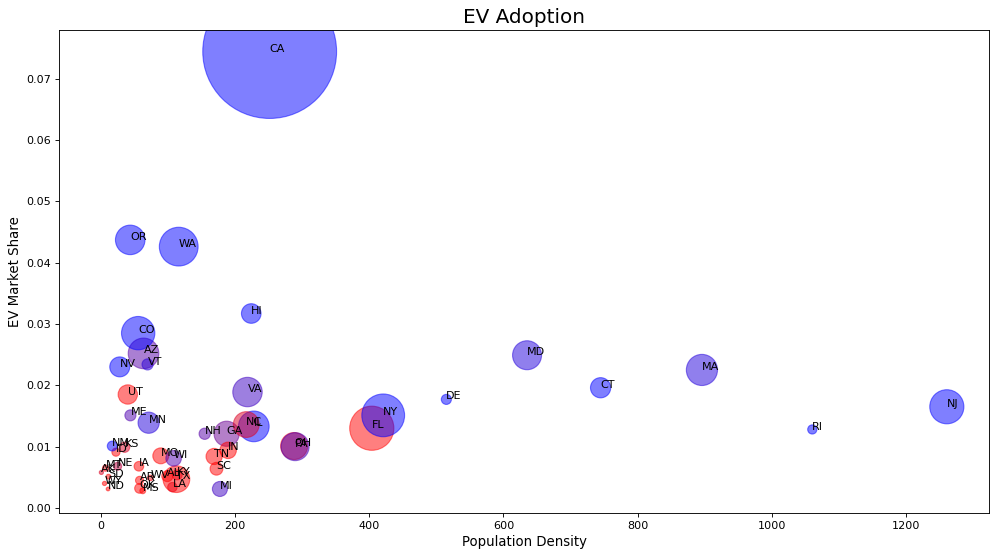

In [105]:
bubble_size_adjust=10
filescombined4=filescombined3.drop('level_0', axis=1)
filescombined4=filescombined4[filescombined4['State Abbreviation'] != 'DC'].reset_index()
filescombined4['EV_sales']=filescombined4['EV_BEV_PHEV_Sales']/bubble_size_adjust


from matplotlib.pyplot import figure

figure(figsize=(15, 8), dpi=80)  

X=filescombined4['Population Density']
Y=filescombined4['EV_BEV_PHEV_Share']
bubble_size=filescombined4['EV_sales']
annotations=filescombined4['State Abbreviation']
state_color=filescombined4['party_score']    # added this

# The following line of code provides a continuous spectrum from red to blue
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["red","blue"])

plt.scatter(X, Y, 
            s=bubble_size,
            c=state_color,   # added this
            cmap=cm1,    # added this
            alpha=0.5)
plt.xlabel("Population Density", size=12)
plt.ylabel("EV Market Share", size=12)
plt.title("EV Adoption", size=18)

for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))
    
# save the graph to a jpeg file
plt.savefig(r"C:\Users\aleci\Documents\Python Training Projects\EV_adoption2.jpg")
plt.show()

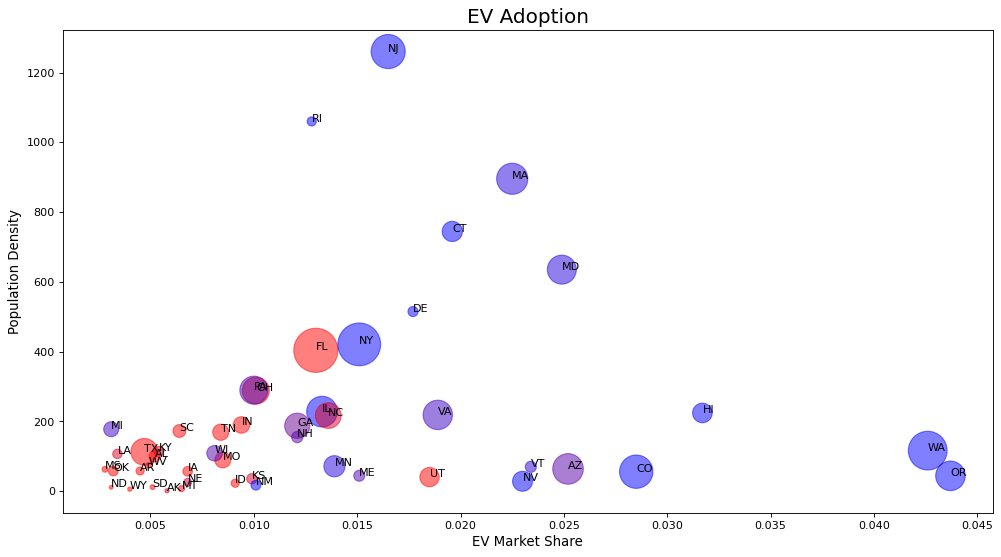

In [106]:
# Zoom in by excluding California

bubble_size_adjust=10
filescombined5=filescombined4.drop('level_0', axis=1)
filescombined5=filescombined5[filescombined5['State Abbreviation'] != 'CA'].reset_index()
filescombined5['EV_sales']=filescombined5['EV_BEV_PHEV_Sales']/bubble_size_adjust


from matplotlib.pyplot import figure

figure(figsize=(15, 8), dpi=80)  

X=filescombined5['EV_BEV_PHEV_Share']
Y=filescombined5['Population Density']
bubble_size=filescombined5['EV_sales']
annotations=filescombined5['State Abbreviation']
state_color=filescombined5['party_score']    # added this

# The following line of code provides a continuous spectrum from red to blue
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["red","blue"])

plt.scatter(X, Y, 
            s=bubble_size,
            c=state_color,   # added this
            cmap=cm1,    # added this
            alpha=0.5)
plt.xlabel("EV Market Share", size=12)
plt.ylabel("Population Density", size=12)
plt.title("EV Adoption", size=18)

for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))
    
# save the graph to a jpeg and png files
plt.savefig(path+'\EV_adoption3.jpg')
plt.savefig(path+'\EV_adoption3.png')
    
plt.show()

### Visualization on a map

In [107]:
#!pip install geopandas

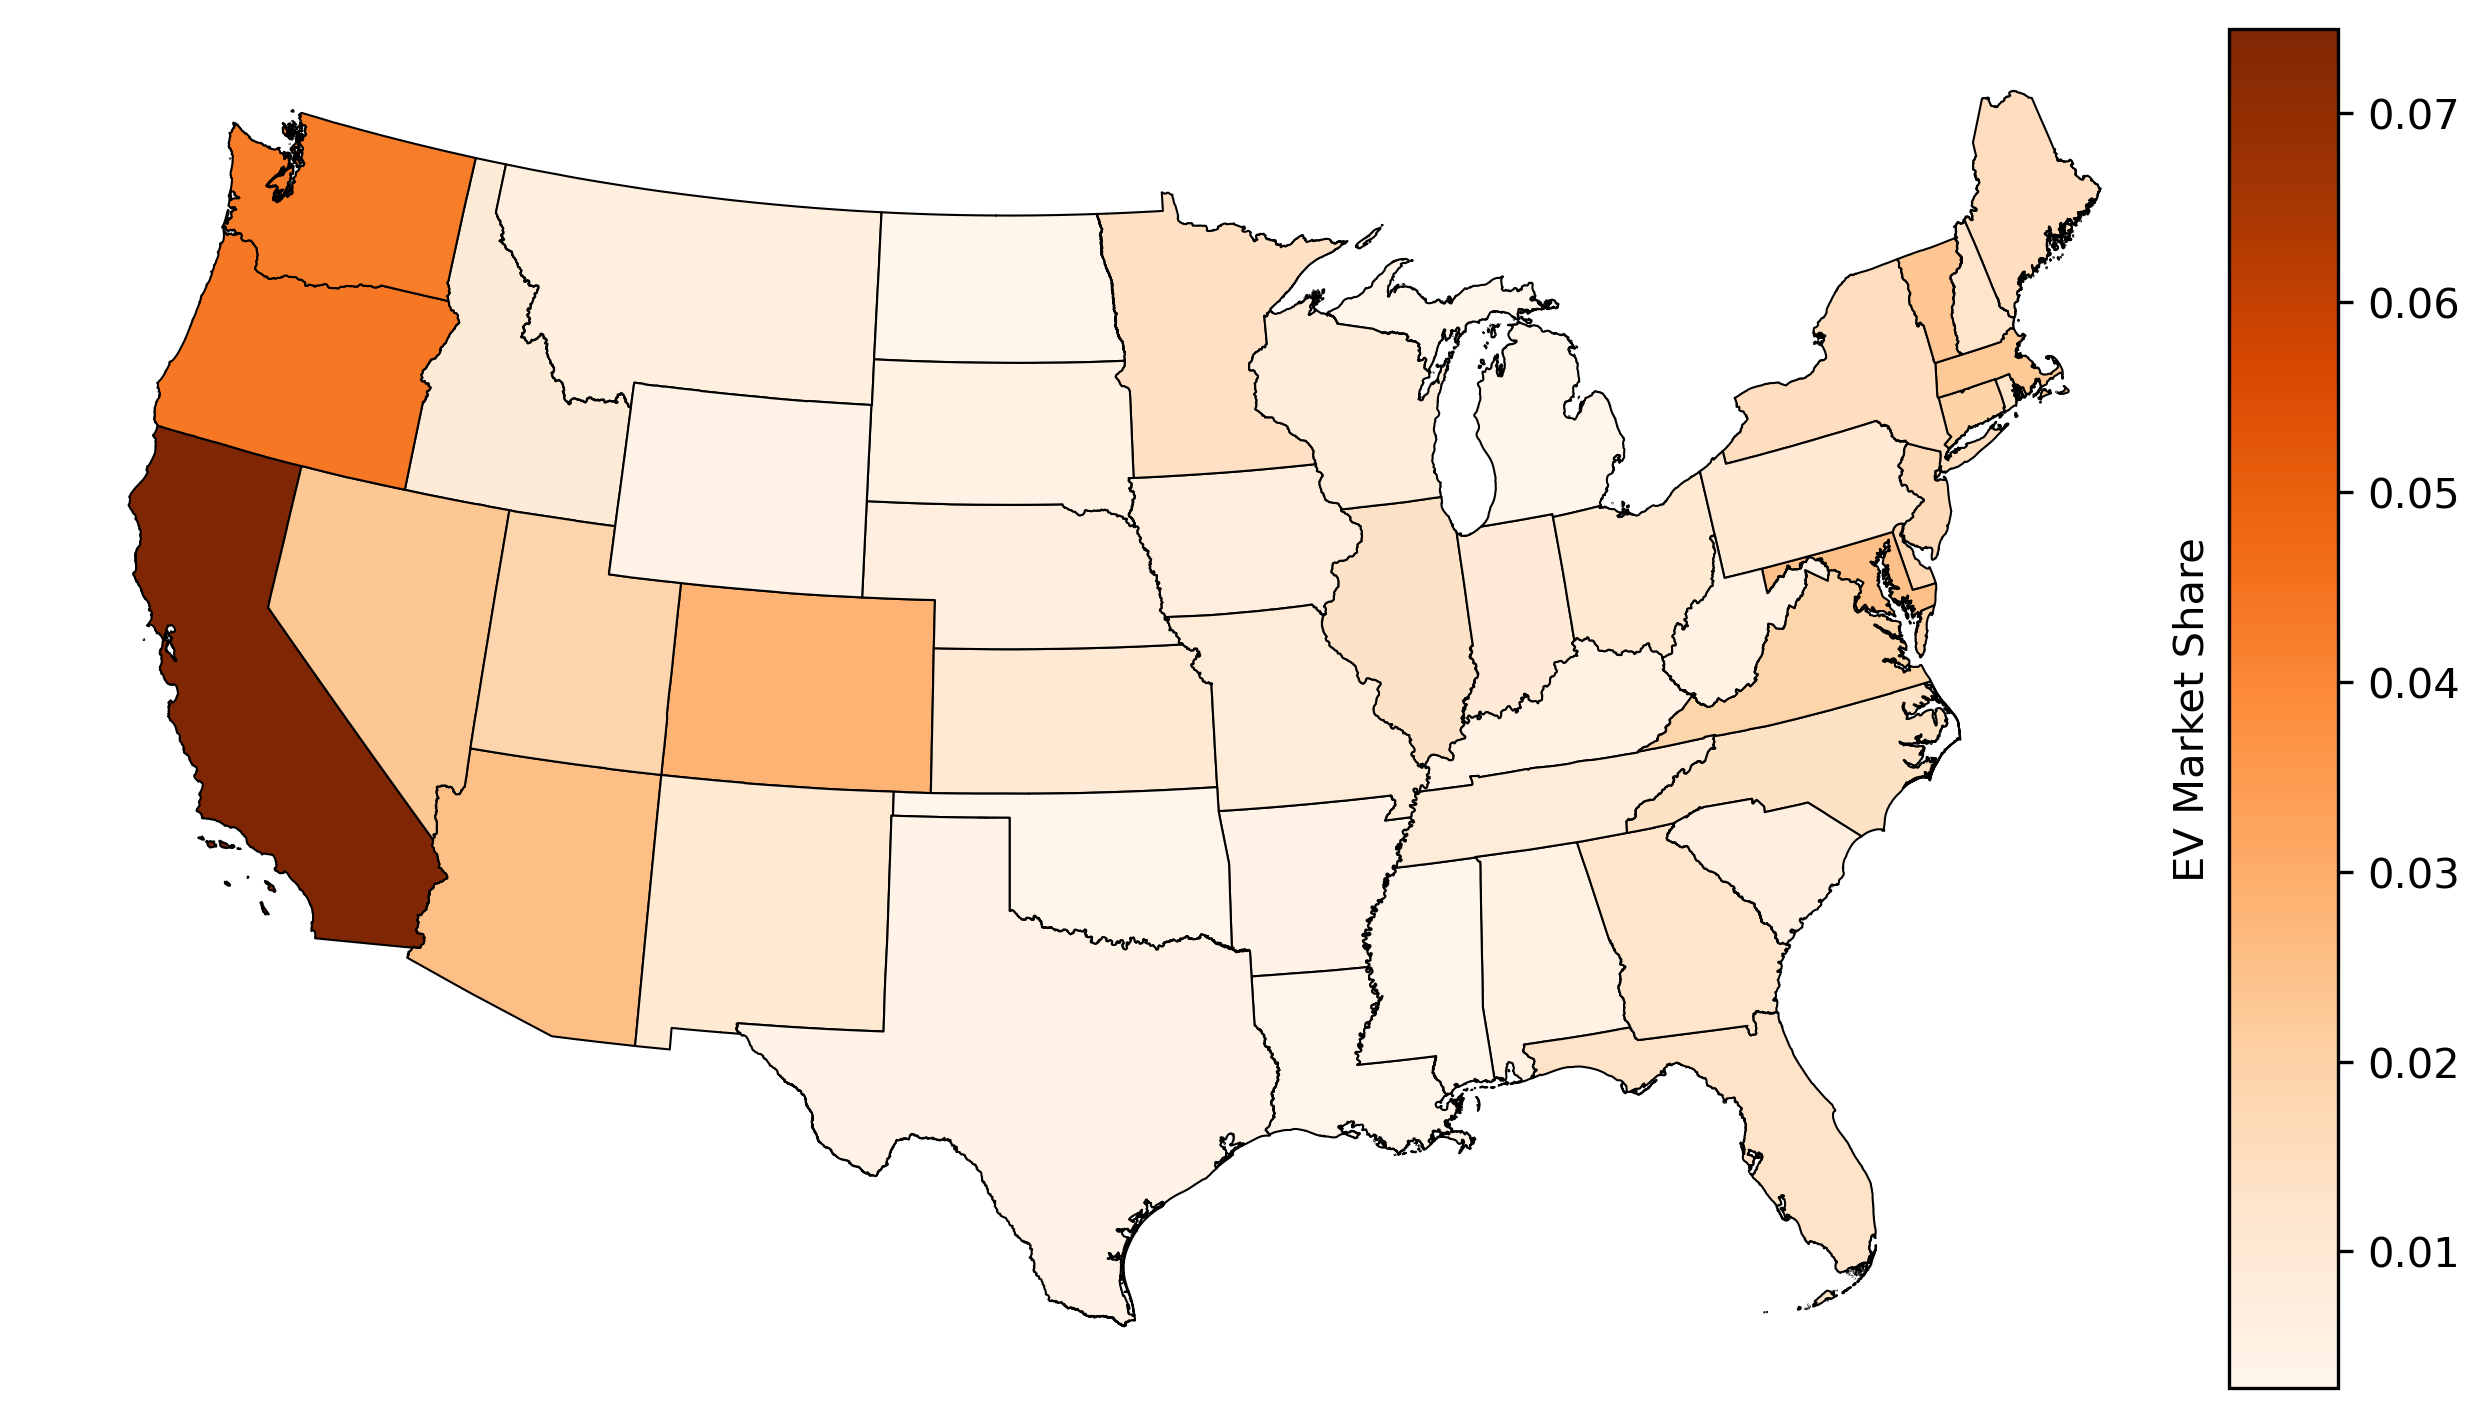

In [108]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# make the 2-letter state abbreviation into the linkage key
filescombined3.rename(columns={'State Abbreviation': 'STUSPS'}, inplace=True)

state_map = gpd.read_file(path+'cb_2018_us_state_500k\cb_2018_us_state_500k.shp')
state_map = state_map[~state_map.STATEFP.isin(['02','15','72','60','66','69','78','11'])]
# fixing projection
state_map = state_map.to_crs('EPSG:2163')

# merging datasets
df_state_map = pd.merge(filescombined3, state_map,on='STUSPS')
df_state_map = gpd.GeoDataFrame(df_state_map)

fig, ax = plt.subplots(1, figsize=(10, 6),dpi=300,facecolor='w',edgecolor='w')
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
#plot
gax = df_state_map.plot(ax=ax,cax=cax, column='EV_BEV_PHEV_Share', cmap='Oranges', legend=True, edgecolor='black', linewidth=0.5,legend_kwds={'shrink':0.6})
ax.set_axis_off()
# label the colorbar
cax.tick_params(labelsize=10)
cax.set_ylabel('EV Market Share',fontsize=10)
cax.yaxis.set_label_position('left')
plt.show()

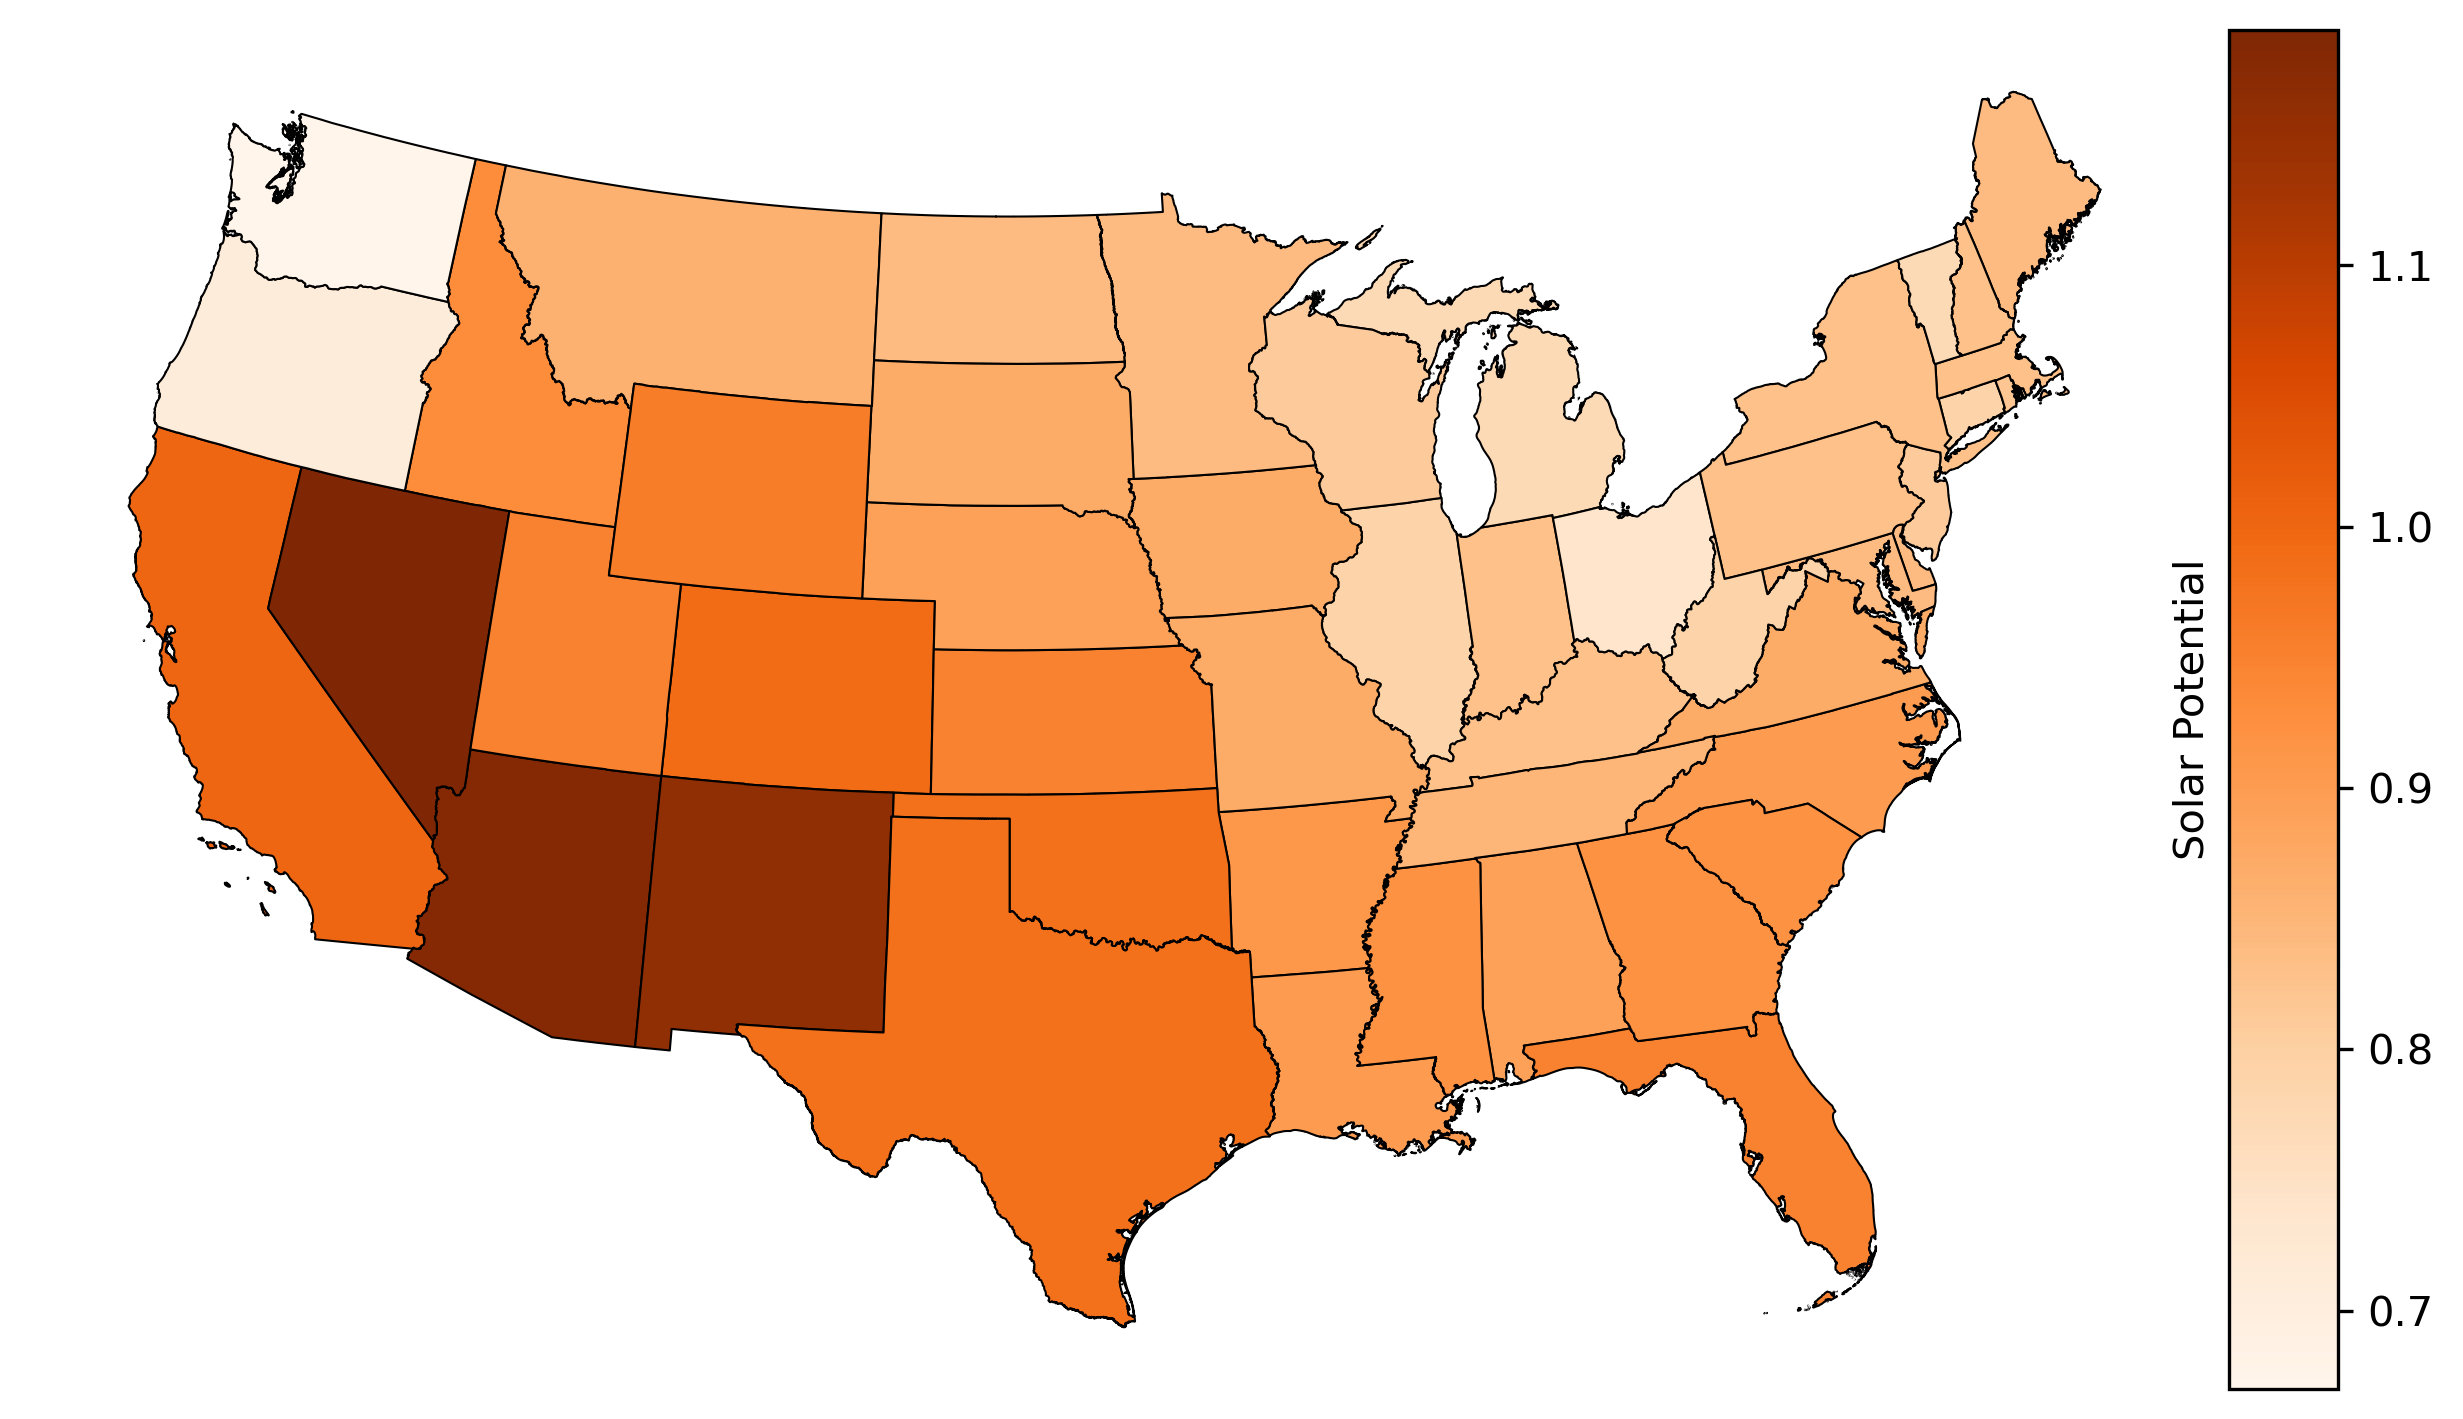

In [109]:
# make the 2-letter state abbreviation into the linkage key
filescombined3.rename(columns={'State Abbreviation': 'STUSPS'}, inplace=True)

state_map = gpd.read_file(path+'cb_2018_us_state_500k\cb_2018_us_state_500k.shp')
state_map = state_map[~state_map.STATEFP.isin(['02','15','72','60','66','69','78','11'])]
# fixing projection
state_map = state_map.to_crs('EPSG:2163')

# merging datasets
df_state_map = pd.merge(filescombined3, state_map,on='STUSPS')
df_state_map = gpd.GeoDataFrame(df_state_map)

fig, ax = plt.subplots(1, figsize=(10, 6),dpi=300,facecolor='w',edgecolor='w')
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
#plot
gax = df_state_map.plot(ax=ax,cax=cax, column='Sun Index', cmap='Oranges', legend=True, edgecolor='black', linewidth=0.5,legend_kwds={'shrink':0.6})
ax.set_axis_off()
# label the colorbar
cax.tick_params(labelsize=10)
cax.set_ylabel('Solar Potential',fontsize=10)
cax.yaxis.set_label_position('left')
plt.show()

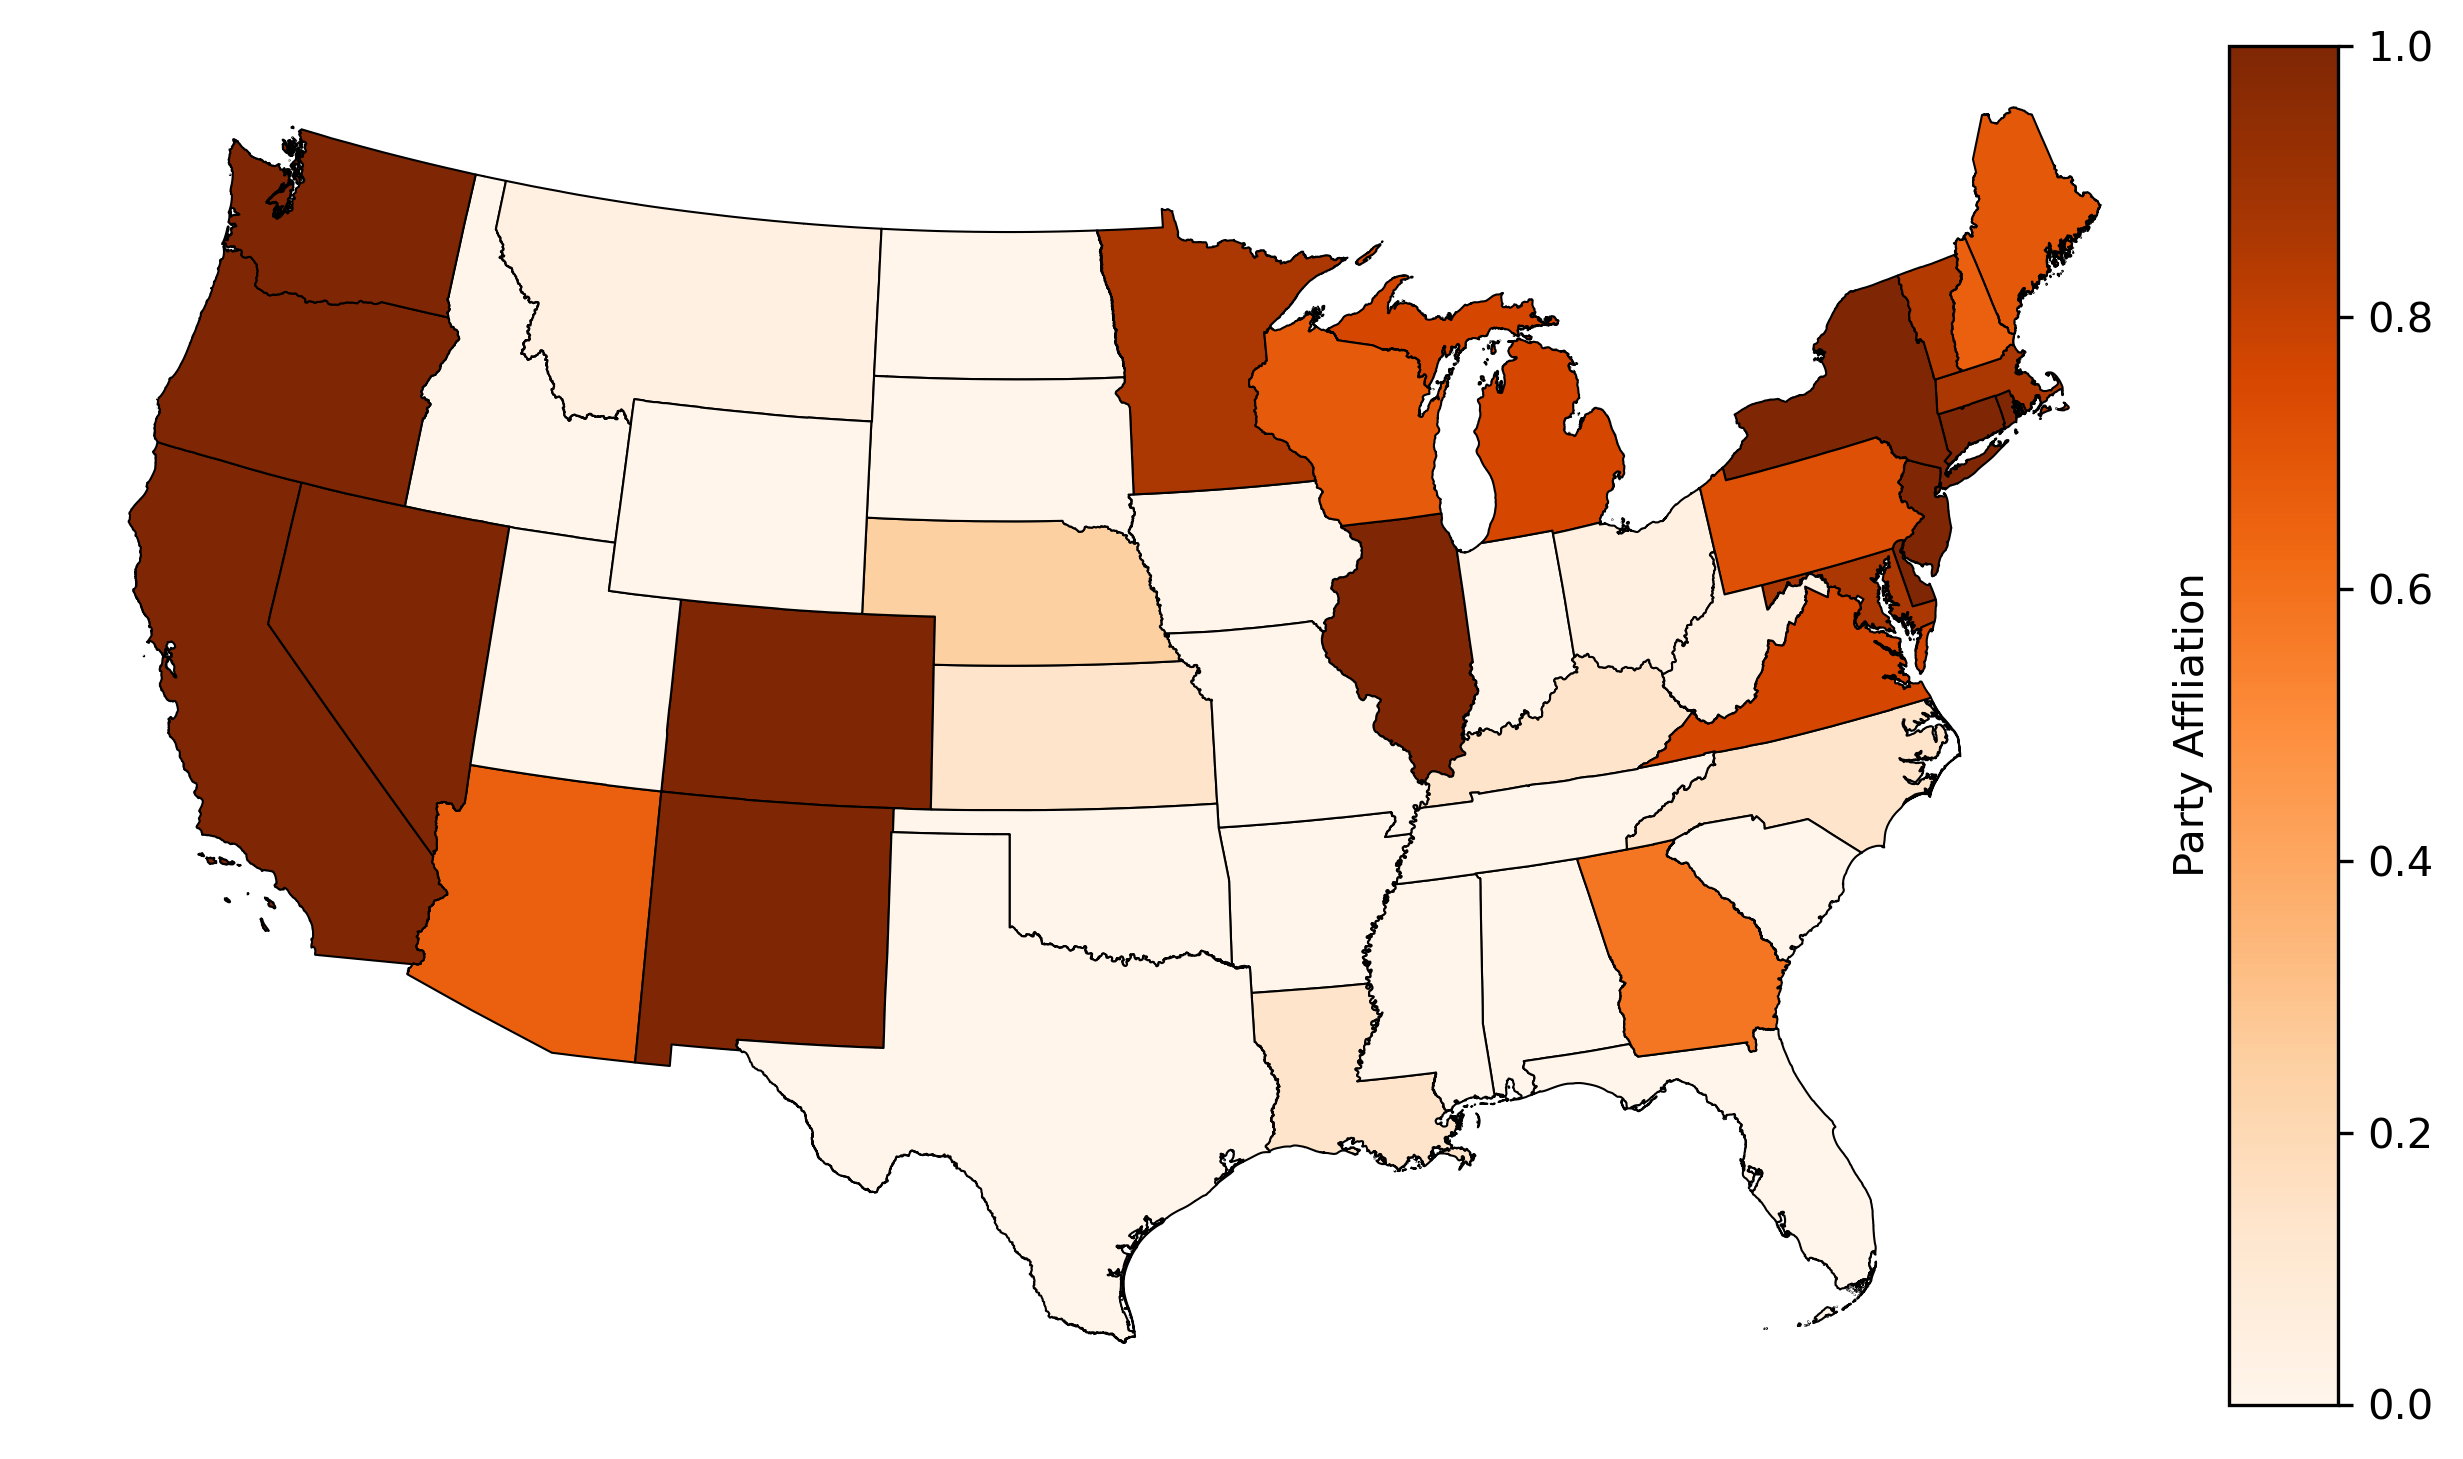

In [110]:
# make the 2-letter state abbreviation into the linkage key
filescombined3.rename(columns={'State Abbreviation': 'STUSPS'}, inplace=True)

state_map = gpd.read_file(path+'cb_2018_us_state_500k\cb_2018_us_state_500k.shp')
state_map = state_map[~state_map.STATEFP.isin(['02','15','72','60','66','69','78','11'])]
# fixing projection
state_map = state_map.to_crs('EPSG:2163')

# merging datasets
df_state_map = pd.merge(filescombined3, state_map,on='STUSPS')
df_state_map = gpd.GeoDataFrame(df_state_map)

fig, ax = plt.subplots(1, figsize=(10, 6),dpi=300,facecolor='w',edgecolor='w')
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
#plot
gax = df_state_map.plot(ax=ax,cax=cax, column='party_score', cmap='Oranges', legend=True, edgecolor='black', linewidth=0.5,legend_kwds={'shrink':0.6})
ax.set_axis_off()
# label the colorbar
cax.tick_params(labelsize=10)
cax.set_ylabel('Party Affliation',fontsize=10)
cax.yaxis.set_label_position('left')
plt.show()

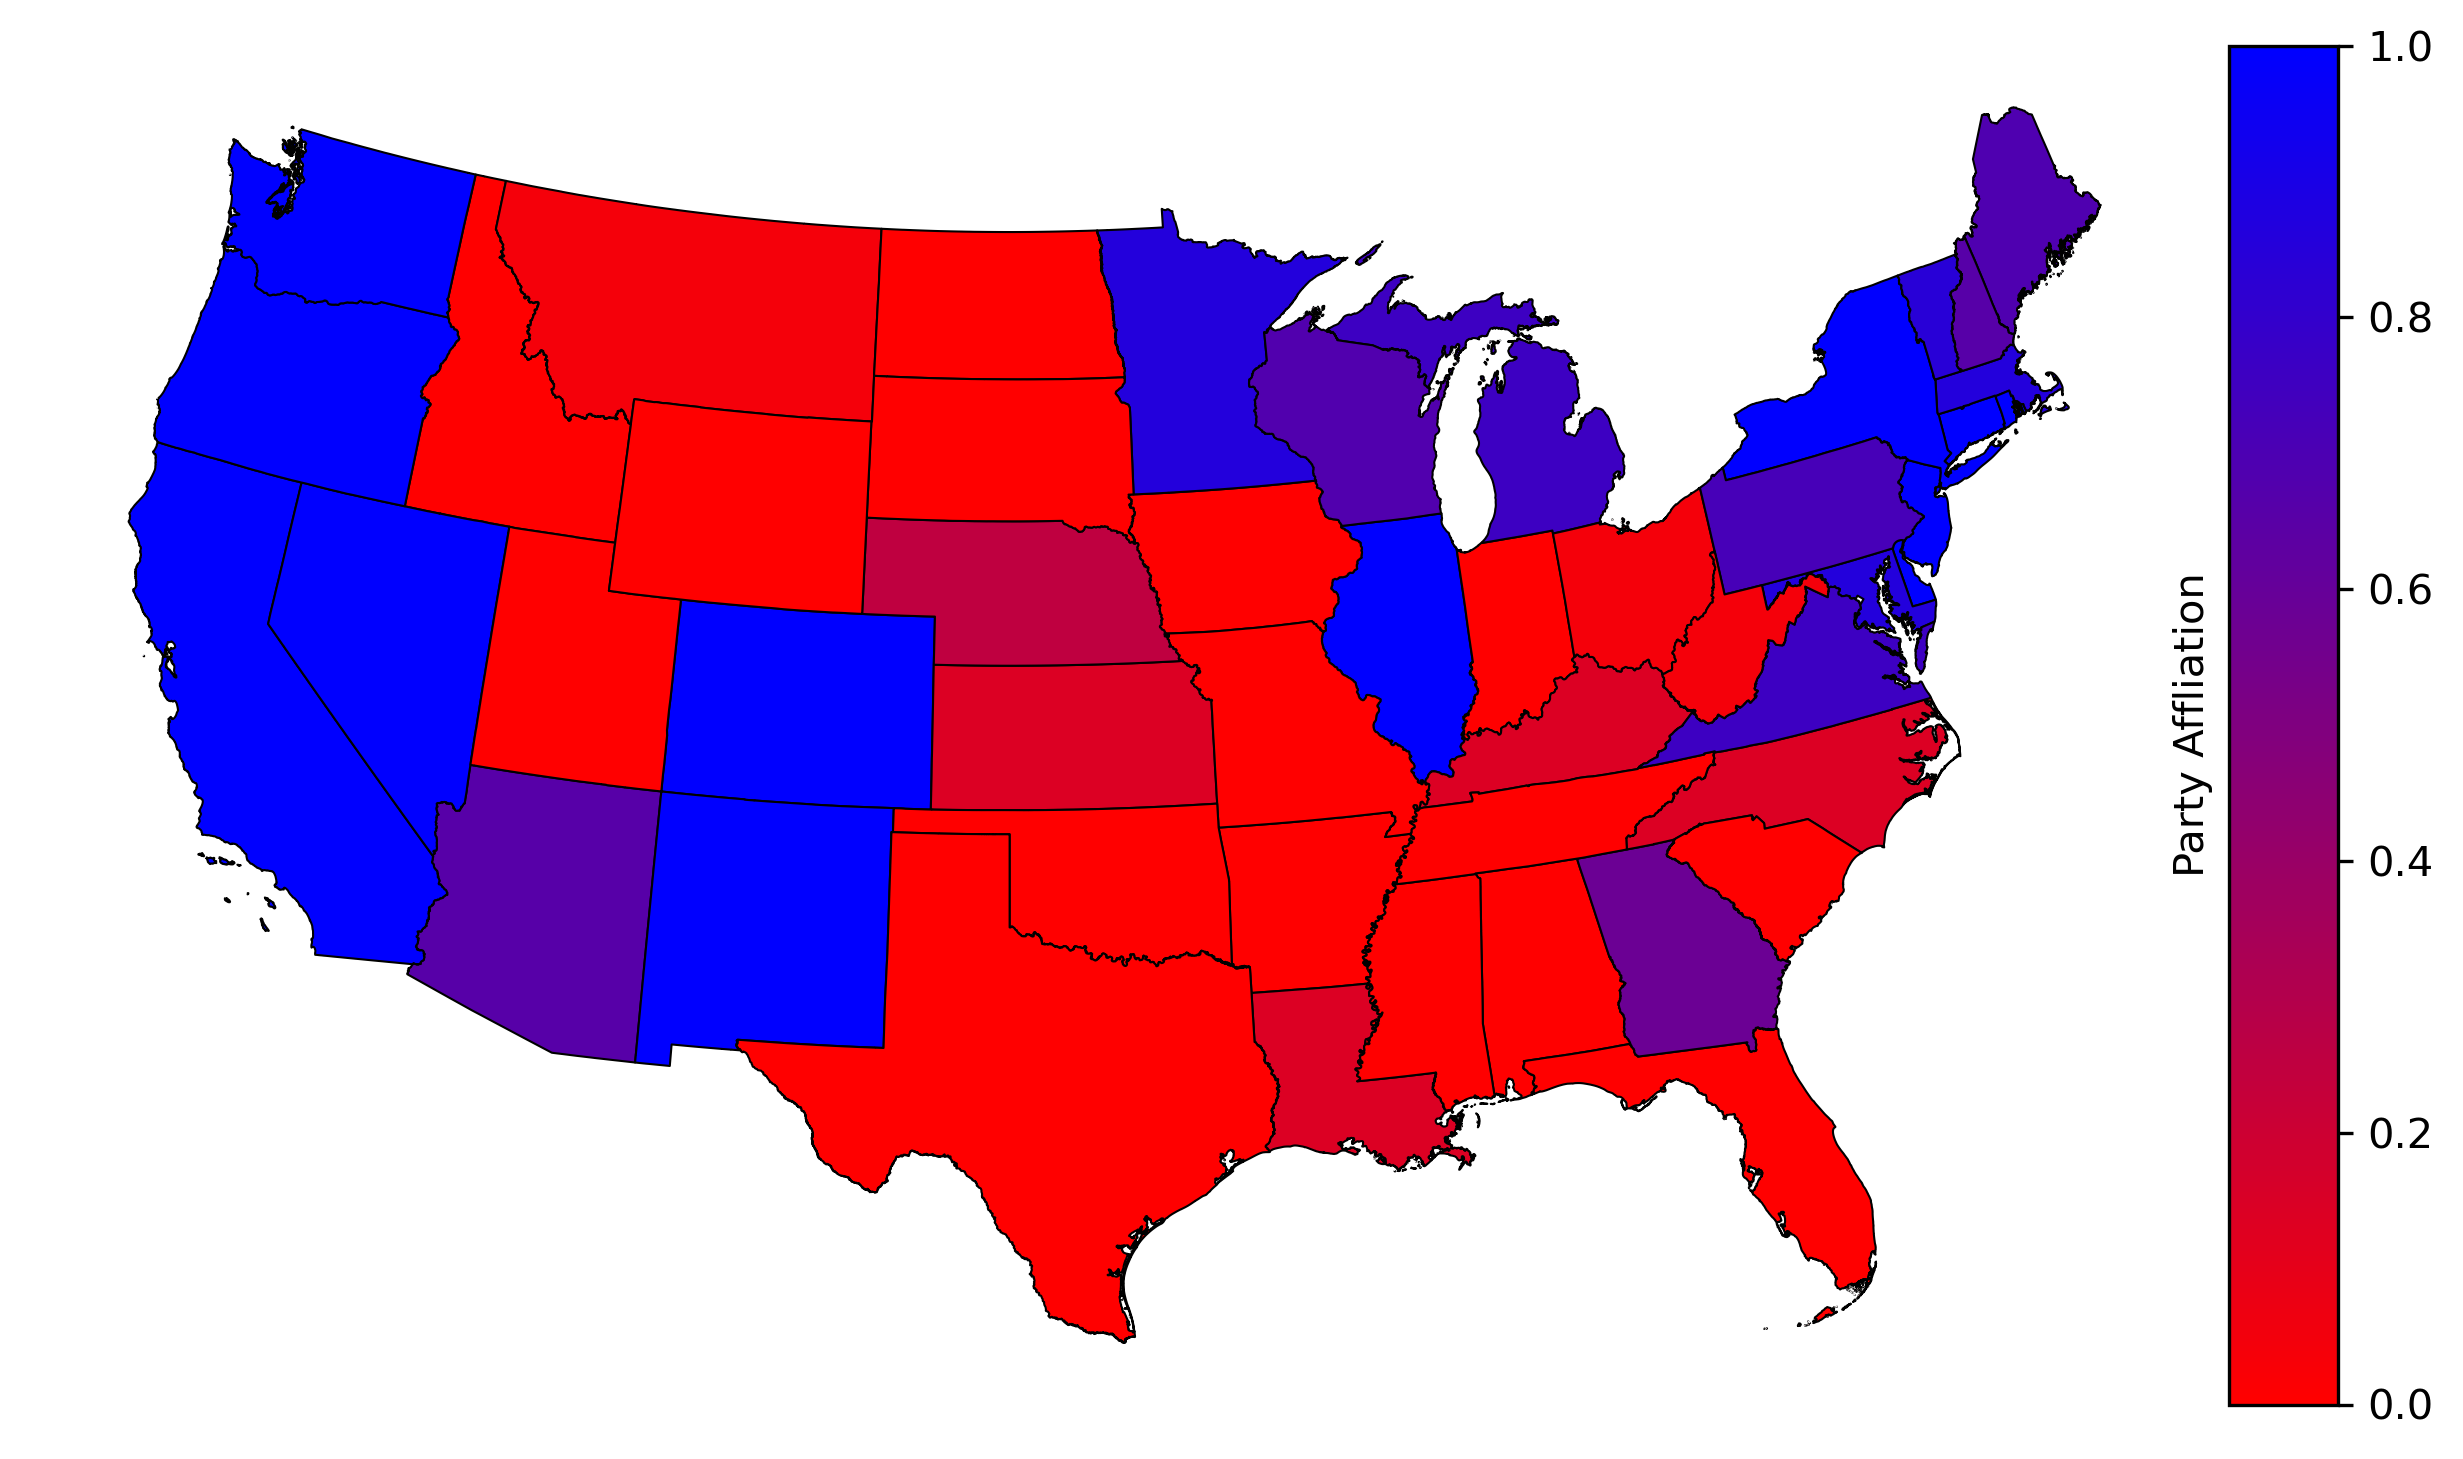

In [111]:
# make the 2-letter state abbreviation into the linkage key
filescombined3.rename(columns={'State Abbreviation': 'STUSPS'}, inplace=True)

state_map = gpd.read_file(path+'cb_2018_us_state_500k\cb_2018_us_state_500k.shp')
state_map = state_map[~state_map.STATEFP.isin(['02','15','72','60','66','69','78','11'])]
# fixing projection
state_map = state_map.to_crs('EPSG:2163')

# The following line of code provides a continuous spectrum from red to blue
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["red","blue"])


# merging datasets
df_state_map = pd.merge(filescombined3, state_map,on='STUSPS')
df_state_map = gpd.GeoDataFrame(df_state_map)

fig, ax = plt.subplots(1, figsize=(10, 6),dpi=300,facecolor='w',edgecolor='w')
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
#plot
gax = df_state_map.plot(ax=ax,cax=cax, column='party_score', cmap=cm1, legend=True, edgecolor='black', linewidth=0.5,legend_kwds={'shrink':0.6})
ax.set_axis_off()
# label the colorbar
cax.tick_params(labelsize=10)
cax.set_ylabel('Party Affliation',fontsize=10)
cax.yaxis.set_label_position('left')
plt.show()

In [112]:
# Alaska and Hawaii do not have data for solar potential (Sun Index), so we exclude them from modeling.
#file_dl=file_dl[~(file_dl['State Abbreviation'].str.strip().isin(['HI', 'AK']))]
file_dl['income log']=np.log(file_dl['Average Income'])

# define response/outcome variable
y=file_dl['EV_BEV_PHEV_Share']

# define explanatory variable
X=file_dl[['Population in 2020', 'Population Density', 'party_score']]

# add constant to predictor variables
x = sm.add_constant(X)

# fit linear regression model
model = sm.OLS(y, X).fit()

# view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      EV_BEV_PHEV_Share   R-squared (uncentered):                   0.797
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                              60.22
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    5.80e-16
Time:                        11:24:17   Log-Likelihood:                          160.36
No. Observations:                  49   AIC:                                     -314.7
Df Residuals:                      46   BIC:                                     -309.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

C:\Users\aleci\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
